In [ ]:
#Geopandas
!pip install rtree psycopg2 GeoAlchemy2 geopy mapclassify fiona pyproj geopandas

In [ ]:
import geopandas as gpd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
json = "/content/drive/MyDrive/snowcapstone team spring 2022/Competition_Data/grid_cells.geojson"
gjson = gpd.read_file(json)
print(gjson.head())

                                cell_id  ...                                           geometry
0  0003f387-71c4-48f6-b2b0-d853bd4f0aba  ...  POLYGON ((-118.71895 37.07419, -118.71895 37.0...
1  000617d8-8c14-43e2-b708-7e3a69fe3cc3  ...  POLYGON ((-107.07679 37.78042, -107.07679 37.7...
2  000863e7-21e6-477d-b799-f5675c348627  ...  POLYGON ((-119.40167 37.02400, -119.40167 37.0...
3  000ba8d9-d6d5-48da-84a2-1fa54951fae1  ...  POLYGON ((-119.32082 37.43171, -119.32082 37.4...
4  00146204-d4e9-4cd8-8f86-d1ef133c5b6d  ...  POLYGON ((-118.52132 36.65735, -118.52132 36.6...

[5 rows x 3 columns]


In [ ]:
sn_gis = "/content/drive/MyDrive/snowcapstone team spring 2022/GIS_Data/Sierra_Nevada_Conservancy_Boundary.geojson"
g_sierra = gpd.read_file(sn_gis)
print(g_sierra.head())

   FID  ...                                           geometry
0    1  ...  MULTIPOLYGON (((-120.68817 41.99364, -120.6661...

[1 rows x 8 columns]


In [ ]:

sn_basin = "/content/drive/MyDrive/snowcapstone team spring 2022/GIS_Data/WIP_Assessment_Areas.geojson"
b_sierra = gpd.read_file(sn_basin)
print(b_sierra.head())

   FID  ...                                           geometry
0    1  ...  POLYGON ((-120.52763 39.28954, -120.48851 39.2...
1    2  ...  POLYGON ((-119.83671 38.88617, -119.81134 38.8...
2    3  ...  POLYGON ((-120.32510 38.68447, -120.32168 38.6...
3    4  ...  POLYGON ((-120.04356 41.99480, -120.00978 41.9...
4    5  ...  POLYGON ((-121.35673 40.48695, -121.35087 40.4...

[5 rows x 7 columns]


In [ ]:
w_gis = "/content/drive/MyDrive/snowcapstone team spring 2022/GIS_Data/WAECY_-_Water_Resource_Inventory_Areas__WRIA_.geojson"
g_washington = gpd.read_file(w_gis)
print(g_washington.head())

   OBJECTID  ...                                           geometry
0         1  ...  MULTIPOLYGON (((-117.42953 49.00047, -117.4291...
1         2  ...  MULTIPOLYGON (((-118.06253 49.00020, -118.0618...
2         3  ...  MULTIPOLYGON (((-121.36437 48.87706, -121.3642...
3         4  ...  MULTIPOLYGON (((-119.15755 49.00007, -119.1424...
4         5  ...  MULTIPOLYGON (((-119.15755 49.00007, -119.1576...

[5 rows x 12 columns]


In [ ]:
import pandas as pd

In [ ]:
#These are dates where no stations had information. 
#Alternative method: Get all dates of cell_id samples, and compare those dates against what each station has for the interpolation
nan_dates = ['2013-04-03', '2013-04-29', '2013-05-03', '2013-05-25', '2013-06-01', '2013-06-08', '2016-02-08', '2016-03-26', '2016-04-01', '2016-04-03', '2016-04-04',
 '2016-04-07', '2016-04-16', '2016-05-09', '2016-05-27', '2016-06-26', '2017-01-28', '2017-01-29', '2018-03-04', '2018-03-30', '2018-03-31', '2018-04-22', '2018-04-23', '2018-04-25', '2018-04-26', '2018-05-24', '2018-05-28', '2018-06-01', '2018-06-02', '2019-03-09', '2019-03-15', '2019-03-16', '2019-03-17', '2019-03-24', '2019-03-25', '2019-03-29', '2019-04-07', '2019-04-08', '2019-04-17',
 '2019-04-18', '2019-04-19', '2019-04-21', '2019-04-27', '2019-04-28', '2019-05-01', '2019-05-02', '2019-05-03', '2019-06-05', '2019-06-08', '2019-06-09', '2019-06-10', '2019-06-13', '2019-06-14', '2019-06-24']

In [ ]:
train_path = "/content/drive/MyDrive/snowcapstone team spring 2022/Competition_Data/ground_measures_train_features.csv"
metadata = "/content/drive/MyDrive/snowcapstone team spring 2022/Competition_Data/ground_measures_metadata.csv"

train = pd.read_csv(train_path)
#Drop nulls
train = train.melt(id_vars=['Unnamed: 0']).dropna().reset_index(drop = True)
train.rename(columns = {'Unnamed: 0':"station_id", "variable":"date", "value":"SWE"}, inplace = True)


In [ ]:
print(f'There are {len(nan_dates)} dates discovered with all missing values in training set')
counter = 0
for date in nan_dates:
  if train[train['date']==date].empty:
    counter+=1
    #print(f'{date} has no recorded points for any station')
  else:
    print(f'{date} has some recorded points:')
    print(train[train['date']==date].head())
print(f'There are {counter} dates discovered no values for any station on that date')


There are 54 dates discovered with all missing values in training set
There are 54 dates discovered no values for any station on that date


In [ ]:
subset = train[train['station_id']=='CDEC:AGP'].copy()
subset = subset.append(pd.DataFrame([['aaa','2012-01-01',1111],['aaaa','2019-11-12',111]], columns=['station_id','date','SWE'])).sort_values(by='date').reset_index(drop=True)

In [ ]:
train[train['station_id']=='CDEC:ADM']

,station_id,date,SWE
0,CDEC:ADM,2013-01-01,5.9
667,CDEC:ADM,2013-01-08,5.9
1335,CDEC:ADM,2013-01-15,6.5
2003,CDEC:ADM,2013-01-22,6.5
2667,CDEC:ADM,2013-01-29,7.4
...,...,...,...
140601,CDEC:ADM,2019-12-03,0.7
141284,CDEC:ADM,2019-12-10,1.2
141966,CDEC:ADM,2019-12-17,3.4
142650,CDEC:ADM,2019-12-24,3.7


In [ ]:
train.iloc[0].isnull().any()

False

In [ ]:
from datetime import datetime
a = datetime.strptime('2012-01-01','%Y-%m-%d')
b = datetime.strptime('2012-01-05','%Y-%m-%d')
(b-a).days

4

In [ ]:
 train[train['station_id']=='CDEC:SSM']

,station_id,date,SWE
140681,CDEC:SSM,2019-12-03,6.23
141363,CDEC:SSM,2019-12-10,10.98
142045,CDEC:SSM,2019-12-17,16.58
142729,CDEC:SSM,2019-12-24,22.24


In [ ]:
import numpy as np
from datetime import datetime
#Do something here to add in dates?

#Linear regression implementation
supplement = []

#Iterate through all the unique stations
for station in train['station_id'].unique(): #['CDEC:SSM']: #
  #Get subset for this station
  subset = train[train['station_id']==station].copy()
  #make filler rows with missing dates
  filler = [[station,date,np.nan] for date in nan_dates]
  #Append filler rows to subset and sort on date and reset index
  subset = subset.append(pd.DataFrame(filler, columns=['station_id','date','SWE'])).sort_values(by='date').reset_index(drop=True)
  #print(station,len(subset.index))
  #print(subset.head())
  for date in nan_dates:
    #Find NaN date
    nan_index = subset.index[subset['date'] == date].tolist()[0]
    nan_date = datetime.strptime(date,'%Y-%m-%d')
    
    #There is a conditional needed for stations that stopped reporting before 2019
    try:
      count=0
      #Find older date that HAS value. Sometimes needed because filler inserted NaNs
      while subset.iloc[nan_index-1-count].isnull().any():
        count+=1
      #Older date (nan-1)
      if (nan_index-1-count)>=0:
        older_date = datetime.strptime(subset.iloc[nan_index-1-count]['date'],'%Y-%m-%d')
        older_swe = subset.iloc[nan_index-1-count]['SWE']
      else:
        older_date = datetime.strptime(subset.iloc[nan_index-1]['date'],'%Y-%m-%d')
        older_swe = np.nan
      #print('Older',nan_index-1,older_date,older_swe)
      #print('NaN-inserted',nan_index,nan_date)

      #Newer date is next date that HAS value, otherwise enter except
      counter=0
      while subset.iloc[nan_index+1+counter].isnull().any():
        counter+=1
      #Newer date
      newer_date = datetime.strptime(subset.iloc[nan_index+1+counter]['date'],'%Y-%m-%d')
      newer_swe = subset.iloc[nan_index+1+counter]['SWE']
      #print('newer',nan_index+1+counter,newer_date,newer_swe)
      #print('______________________________')

      #Change per day
      delta_day = (newer_swe-older_swe)/(newer_date-older_date).days

      #Add expected change to older swe
      est_swe = older_swe + (delta_day*(nan_date-older_date).days)

      #Add "entry" row to supplement
      supplement.append([station,date,est_swe])
    #IndexError happens when the last date is actually from the nan list. Because of this, We DEFINITELY need to do some inter-station interpolation
    except IndexError:
      supplement.append([station,date,np.nan])

#Problem with simple linear interpolation: There are large enough gaps that the "missing days" in the data sometimes are the closest dates to themselves


In [ ]:
#supplement

In [ ]:
supplement[400:410]

[['CDEC:BIM', '2018-04-23', 0.3085714285714285],
 ['CDEC:BIM', '2018-04-25', 0.24],
 ['CDEC:BIM', '2018-04-26', 0.24],
 ['CDEC:BIM', '2018-05-24', 0.3942857142857143],
 ['CDEC:BIM', '2018-05-28', 0.46285714285714286],
 ['CDEC:BIM', '2018-06-01', 0.48],
 ['CDEC:BIM', '2018-06-02', 0.48],
 ['CDEC:BIM', '2019-03-09', nan],
 ['CDEC:BIM', '2019-03-15', nan],
 ['CDEC:BIM', '2019-03-16', nan]]

In [ ]:
w = train[train['station_id']=='CDEC:BIM']
print(w[w['date']=='2018-05-29'])
print(w[w['date']=='2018-06-05'])

       station_id        date   SWE
116716   CDEC:BIM  2018-05-29  0.48
       station_id        date   SWE
117395   CDEC:BIM  2018-06-05  0.48


In [ ]:
w = train[train['station_id']=='CDEC:ADM']
print(w[w['date']=='2018-02-27'])
print(w[w['date']=='2018-03-06'])

       station_id        date  SWE
107861   CDEC:ADM  2018-02-27  3.3
       station_id        date  SWE
108543   CDEC:ADM  2018-03-06  4.5


In [ ]:
#Add incomplete supplement (testing to see how many knn nans are filled in)
#train = train.append(pd.DataFrame(supplement, columns=['station_id','date','SWE'])).sort_values(by='date').reset_index(drop=True)

#Get Metadata
meta = pd.read_csv(metadata)

#Merge with metadata
trainmeta = train.merge(meta, how = 'left', on='station_id')

In [ ]:
len(train['station_id'].unique())

698

In [ ]:
sierra_train = trainmeta[trainmeta['state']=='California']
crockies_train = trainmeta[(trainmeta['state']=='Colorado') | (trainmeta['state']=='New Mexico') | (trainmeta['state']=='Wyoming')]

In [ ]:
trainmeta[(trainmeta['state']=='California')&(trainmeta['date']=='2013-01-01')]

,station_id,date,SWE,name,elevation_m,latitude,longitude,state
0,CDEC:ADM,2013-01-01,5.90,Adin Mountain,1889.760000,41.237000,-120.792000,California
1,CDEC:AGP,2013-01-01,17.52,Agnew Pass,2880.360000,37.726631,-119.141731,California
2,CDEC:ALP,2013-01-01,12.75,Alpha (Smud),2316.480000,38.804192,-120.215652,California
3,CDEC:BCB,2013-01-01,4.30,Blackcap Basin,3139.440000,37.066685,-118.773010,California
4,CDEC:BCH,2013-01-01,2.88,Beach Meadows,2331.720000,36.126095,-118.293457,California
...,...,...,...,...,...,...,...,...
543,SNOTEL:778_CA_SNTL,2013-01-01,3.40,Spratt Creek,1848.002441,38.666271,-119.817413,California
548,SNOTEL:784_CA_SNTL,2013-01-01,31.00,Squaw Valley G.C.,2442.362305,39.189861,-120.265762,California
564,SNOTEL:809_CA_SNTL,2013-01-01,6.30,Tahoe City Cross,2071.725586,39.171619,-120.153618,California
585,SNOTEL:834_CA_SNTL,2013-01-01,10.40,Truckee #2,1983.943237,39.300869,-120.184067,California


In [ ]:
crockies_train

,station_id,date,SWE,name,elevation_m,latitude,longitude,state
102,SNOTEL:1005_CO_SNTL,2013-01-01,5.3,Ute Creek,3246.120117,37.614971,-105.373268,Colorado
108,SNOTEL:1014_CO_SNTL,2013-01-01,3.1,Middle Fork Camp,2724.912109,39.795601,-106.027298,Colorado
109,SNOTEL:1015_WY_SNTL,2013-01-01,5.0,Sage Creek Basin,2392.679932,41.401001,-107.257172,Wyoming
111,SNOTEL:1017_NM_SNTL,2013-01-01,3.7,Vacas Locas,2836.468750,36.026348,-106.813622,New Mexico
112,SNOTEL:1030_CO_SNTL,2013-01-01,8.0,Arapaho Ridge,3340.607910,40.350979,-106.381416,Colorado
...,...,...,...,...,...,...,...,...
143995,SNOTEL:935_CO_SNTL,2019-12-31,5.7,Jackwhacker Gulch,3340.607910,39.566669,-105.800003,Colorado
143996,SNOTEL:936_CO_SNTL,2019-12-31,3.5,Echo Lake,3230.879883,39.656269,-105.593452,Colorado
143997,SNOTEL:937_CO_SNTL,2019-12-31,5.1,Michigan Creek,3230.879883,39.435768,-105.910782,Colorado
143998,SNOTEL:939_CO_SNTL,2019-12-31,4.6,Rough And Tumble,3157.728027,39.033329,-106.083328,Colorado


In [ ]:
labels_path = "/content/drive/MyDrive/snowcapstone team spring 2022/Competition_Data/train_labels.csv"

labels = pd.read_csv(labels_path)

labels = labels.melt(id_vars=["cell_id"]).dropna().reset_index(drop = True)
labels.rename(columns = {"cell_id":"cell_id", "variable":"date", "value":"SWE"}, inplace = True)

labels = labels.merge(gjson, how = 'left', on='cell_id')

labels = gpd.GeoDataFrame(labels, crs = "EPSG:4326")
labels

,cell_id,date,SWE,region,geometry
0,00c4db22-a423-41a4-ada6-a8b1b04153a4,2013-01-01,12.7,other,"POLYGON ((-121.93492 41.16327, -121.93492 41.1..."
1,018cf1a1-f945-4097-9c47-0c4690538bb5,2013-01-01,20.4,sierras,"POLYGON ((-120.61440 39.67242, -120.61440 39.6..."
2,01be2cc7-ef77-4e4d-80ed-c4f8139162c3,2013-01-01,37.0,sierras,"POLYGON ((-119.60829 38.27575, -119.60829 38.2..."
3,02c3ec4a-8de4-4284-9ec1-5a942d3d098e,2013-01-01,2.3,other,"POLYGON ((-107.19357 44.57879, -107.19357 44.5..."
4,02cf33c2-c8e2-48b9-bf72-92506e97e251,2013-01-01,8.0,central rockies,"POLYGON ((-106.60068 40.39461, -106.60068 40.4..."
...,...,...,...,...,...
91485,fd4492f2-8aa9-4279-bdc0-73991786943f,2019-12-31,1.3,central rockies,"POLYGON ((-105.07354 38.87270, -105.07354 38.8..."
91486,fde3221a-9ce3-45a9-857f-bd196b07aa05,2019-12-31,5.6,central rockies,"POLYGON ((-106.10661 39.29804, -106.10661 39.3..."
91487,fdeb8912-f9d1-445d-aadb-e943534f67fe,2019-12-31,8.8,central rockies,"POLYGON ((-107.92120 37.79462, -107.92120 37.8..."
91488,fe33672e-7ea7-4c5d-8639-96b2cc7edb0c,2019-12-31,2.9,other,"POLYGON ((-122.02475 43.89659, -122.02475 43.9..."


In [ ]:
labels['region'].unique()

array(['other', 'sierras', 'central rockies'], dtype=object)

In [ ]:
crockies_label = labels[labels['region']=='central rockies']
sierra_label = labels[labels['region']=='sierras']

In [ ]:
import matplotlib.pyplot as plt

sierra_label = sierra_label.groupby('date')['cell_id'].nunique().to_frame().reset_index()
crockies_label = crockies_label.groupby('date')['cell_id'].nunique().to_frame().reset_index()

crockies_train = crockies_train.groupby('date')['station_id'].nunique().to_frame().reset_index()
sierra_train = sierra_train.groupby('date')['station_id'].nunique().to_frame().reset_index()




In [ ]:
sierra_label['date'] = pd.to_datetime(sierra_label['date'])
sierra_train['date'] = pd.to_datetime(sierra_label['date'])

In [ ]:
sierra_train

,date,station_id
0,2013-01-01,123
1,2013-01-08,124
2,2013-01-15,124
3,2013-01-22,120
4,2013-01-29,122
...,...,...
208,2019-01-22,117
209,2019-01-29,117
210,2019-02-05,118
211,2019-02-12,117


In [ ]:
sierra_label[sierra_label['date']<'2014-01-01']

,date,cell_id
0,2013-01-01,18
1,2013-01-08,18
2,2013-01-15,18
3,2013-01-22,17
4,2013-01-29,18
5,2013-02-05,19
6,2013-02-12,19
7,2013-02-19,19
8,2013-02-26,19
9,2013-03-05,19


In [ ]:
pd.concat([sierra_train[sierra_train['date']<'2014-01-01']['date'],sierra_label[sierra_label['date']<'2014-01-01']['date']]).drop_duplicates().reset_index(drop=True)

0    2013-01-01
1    2013-01-08
2    2013-01-15
3    2013-01-22
4    2013-01-29
5    2013-02-05
6    2013-02-12
7    2013-02-19
8    2013-02-26
9    2013-03-05
10   2013-03-12
11   2013-03-19
12   2013-03-26
13   2013-04-02
14   2013-04-03
15   2013-04-09
16   2013-04-16
17   2013-04-23
18   2013-04-29
19   2013-04-30
20   2013-05-03
21   2013-05-07
22   2013-05-14
23   2013-05-21
24   2013-05-25
25   2013-05-28
26   2013-06-01
27   2013-06-04
28   2013-06-08
29   2013-06-11
30   2013-06-18
31   2013-06-25
32   2013-12-03
33   2013-12-10
34   2013-12-17
35   2013-12-24
36   2013-12-31
Name: date, dtype: datetime64[ns]

In [ ]:
sierra_label[sierra_label['date']<'2014-01-01']['date']

0    2013-01-01
1    2013-01-08
2    2013-01-15
3    2013-01-22
4    2013-01-29
5    2013-02-05
6    2013-02-12
7    2013-02-19
8    2013-02-26
9    2013-03-05
10   2013-03-12
11   2013-03-19
12   2013-03-26
13   2013-04-02
14   2013-04-03
15   2013-04-09
16   2013-04-16
17   2013-04-23
18   2013-04-29
19   2013-04-30
20   2013-05-03
21   2013-05-07
22   2013-05-14
23   2013-05-21
24   2013-05-25
25   2013-05-28
26   2013-06-01
27   2013-06-04
28   2013-06-08
29   2013-06-11
30   2013-06-18
31   2013-06-25
32   2013-12-03
33   2013-12-10
34   2013-12-17
35   2013-12-24
36   2013-12-31
Name: date, dtype: datetime64[ns]

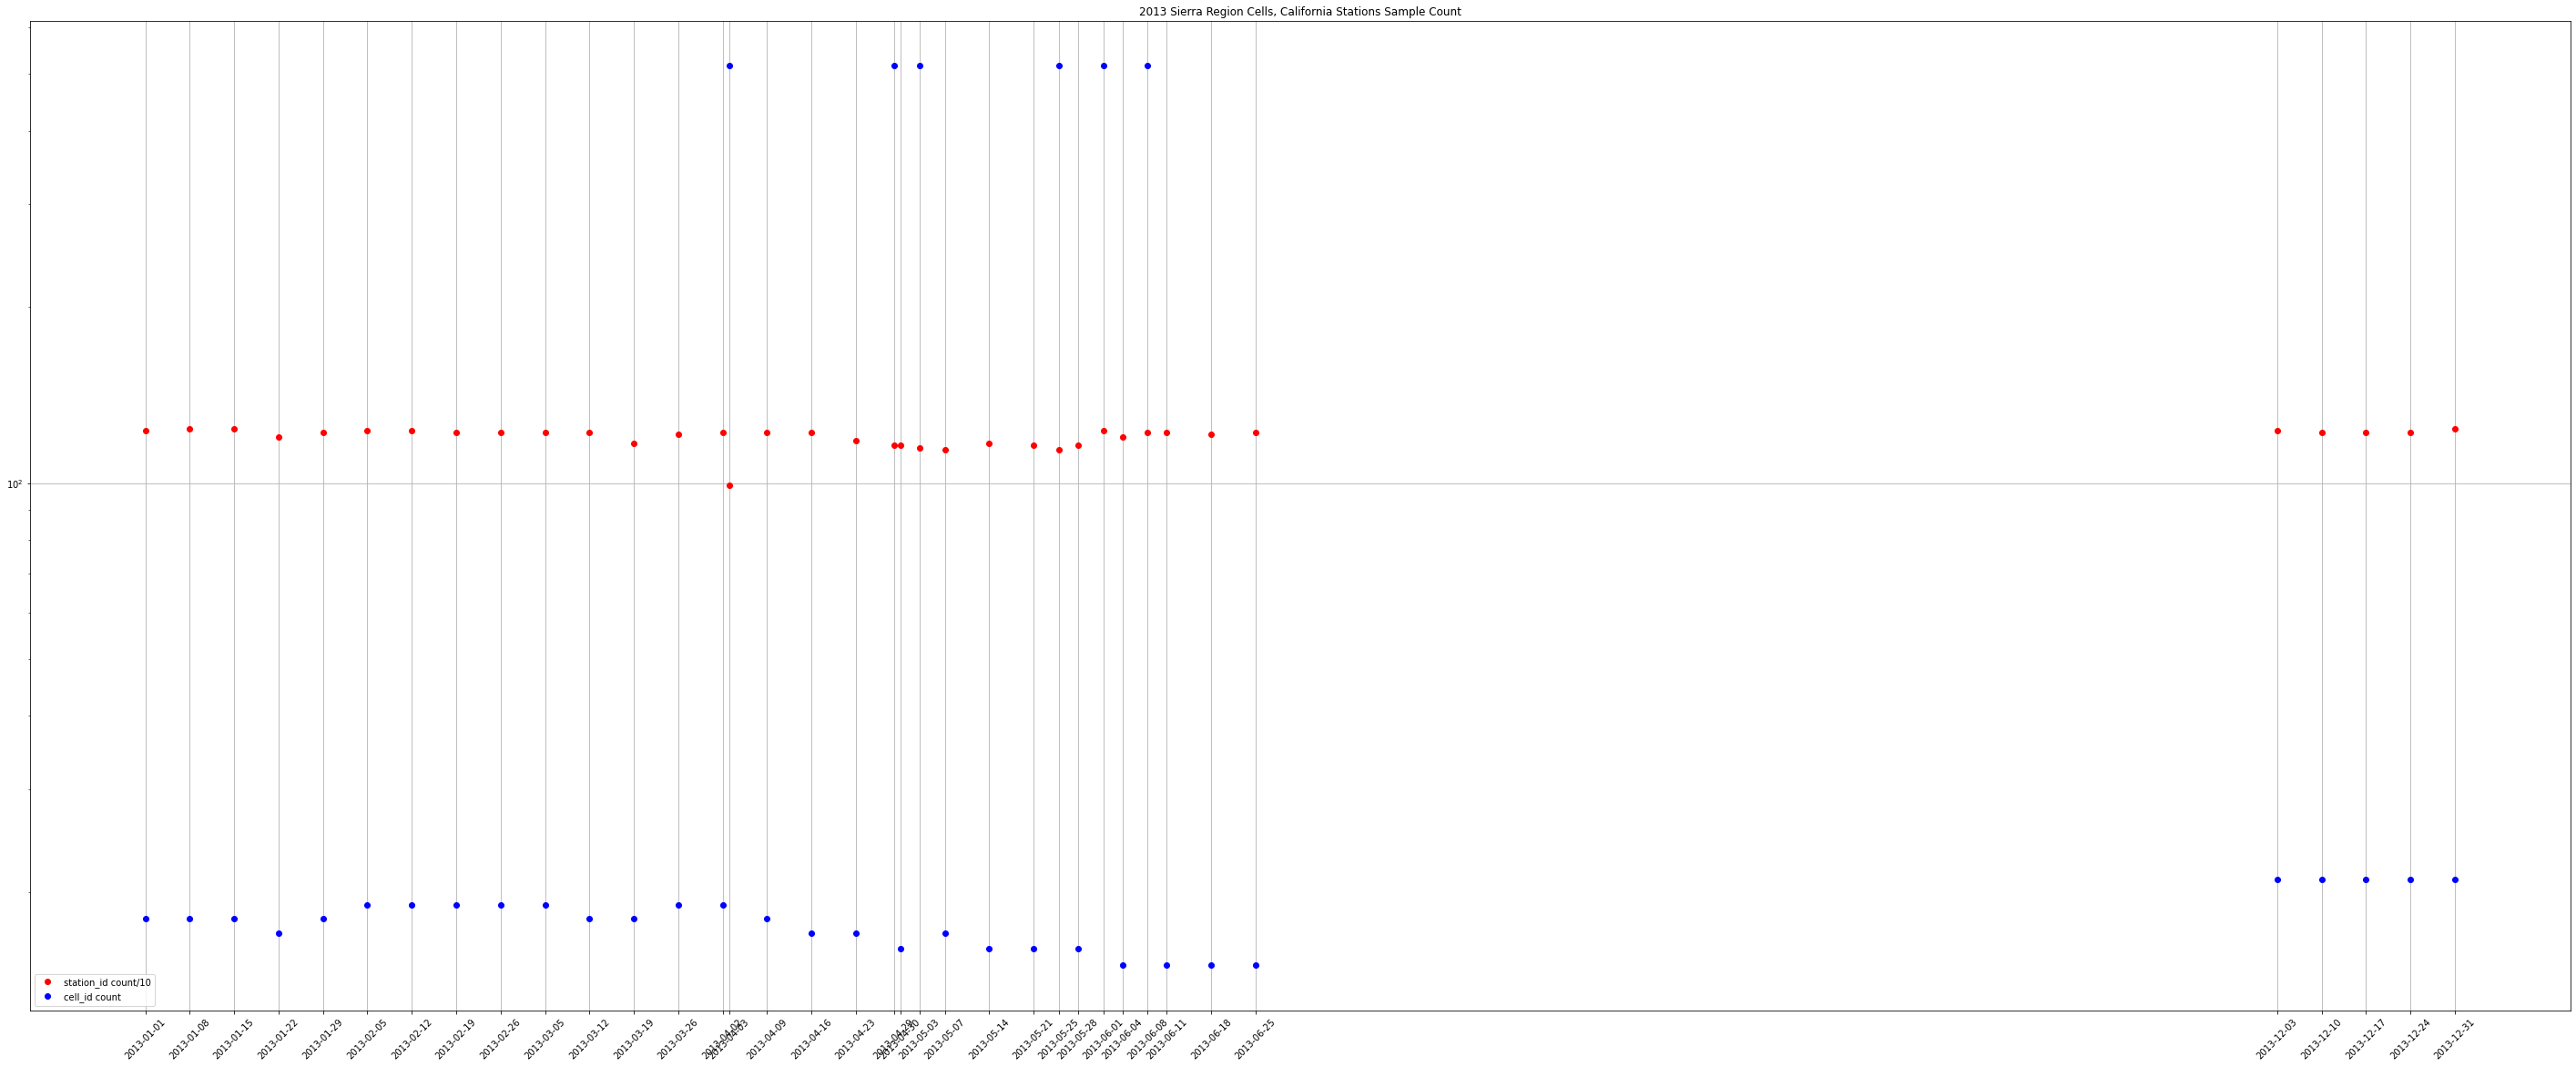

In [ ]:
import matplotlib as mpl
fig, ax = plt.subplots(figsize = (50,20))

plt.xticks(rotation = 45)
plt.plot_date(sierra_train[sierra_train['date']<'2014-01-01']['date'],sierra_train[sierra_train['date']<'2014-01-01']['station_id'],color='red',label='station_id count/10')
plt.plot_date(sierra_label[sierra_label['date']<'2014-01-01']['date'],sierra_label[sierra_label['date']<'2014-01-01']['cell_id'],color='blue',label = 'cell_id count')

days = sierra_train[sierra_train['date']<'2014-01-01']['date'].append

locator = mpl.dates.DayLocator()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y-%m-%d'))

ax.set_xticks(pd.concat([sierra_train[sierra_train['date']<'2014-01-01']['date'],sierra_label[sierra_label['date']<'2014-01-01']['date']]).drop_duplicates().reset_index(drop=True))
plt.title('2013 Sierra Region Cells, California Stations Sample Count')
plt.legend(loc='lower left')
plt.yscale('log')
ax.grid(which='major',axis='both')

In [ ]:
xor = set(labels['date'].unique()) ^ set(train['date'].unique())
len(xor)

0

In [ ]:
#Dates in train but not in labels
len(set(train['date'].unique())-set(labels['date'].unique()))

0

In [ ]:
#Dates in labels but not in train
len(set(labels['date'].unique())-set(train['date'].unique()))

0

In [ ]:
gdf = gpd.GeoDataFrame(meta, 
                       geometry = gpd.points_from_xy(meta.longitude, meta.latitude),
                       crs = "EPSG:4326")
gdf

,station_id,name,elevation_m,latitude,longitude,state,geometry
0,CDEC:ADM,Adin Mountain,1889.760000,41.237000,-120.792000,California,POINT (-120.79200 41.23700)
1,CDEC:AGP,Agnew Pass,2880.360000,37.726631,-119.141731,California,POINT (-119.14173 37.72663)
2,CDEC:ALP,Alpha (Smud),2316.480000,38.804192,-120.215652,California,POINT (-120.21565 38.80419)
3,CDEC:BCB,Blackcap Basin,3139.440000,37.066685,-118.773010,California,POINT (-118.77301 37.06668)
4,CDEC:BCH,Beach Meadows,2331.720000,36.126095,-118.293457,California,POINT (-118.29346 36.12609)
...,...,...,...,...,...,...,...
695,SNOTEL:989_ID_SNTL,Moscow Mountain,1432.560059,46.805000,-116.853500,Idaho,POINT (-116.85350 46.80500)
696,SNOTEL:990_WA_SNTL,Beaver Pass,1106.423950,48.879299,-121.255501,Washington,POINT (-121.25550 48.87930)
697,SNOTEL:992_UT_SNTL,Bear River RS,2675.229492,40.885201,-110.827698,Utah,POINT (-110.82770 40.88520)
698,SNOTEL:998_WA_SNTL,Easy Pass,1606.296021,48.859329,-121.438950,Washington,POINT (-121.43895 48.85933)


In [ ]:
gdf['state'].unique()

array(['California', 'Oregon', 'Colorado', 'Montana', 'Washington',
       'Utah', 'Wyoming', 'Idaho', 'New Mexico', 'Nevada', 'Arizona',
       'South Dakota'], dtype=object)

In [ ]:
for i, r in gdf.iterrows():
  a = r
' '.join([r.station_id,str(1)])


'SNOTEL:999_WA_SNTL 1'

In [ ]:
labels.iloc[5]['geometry'].boundary.distance(r.geometry)

10.451992746949742

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



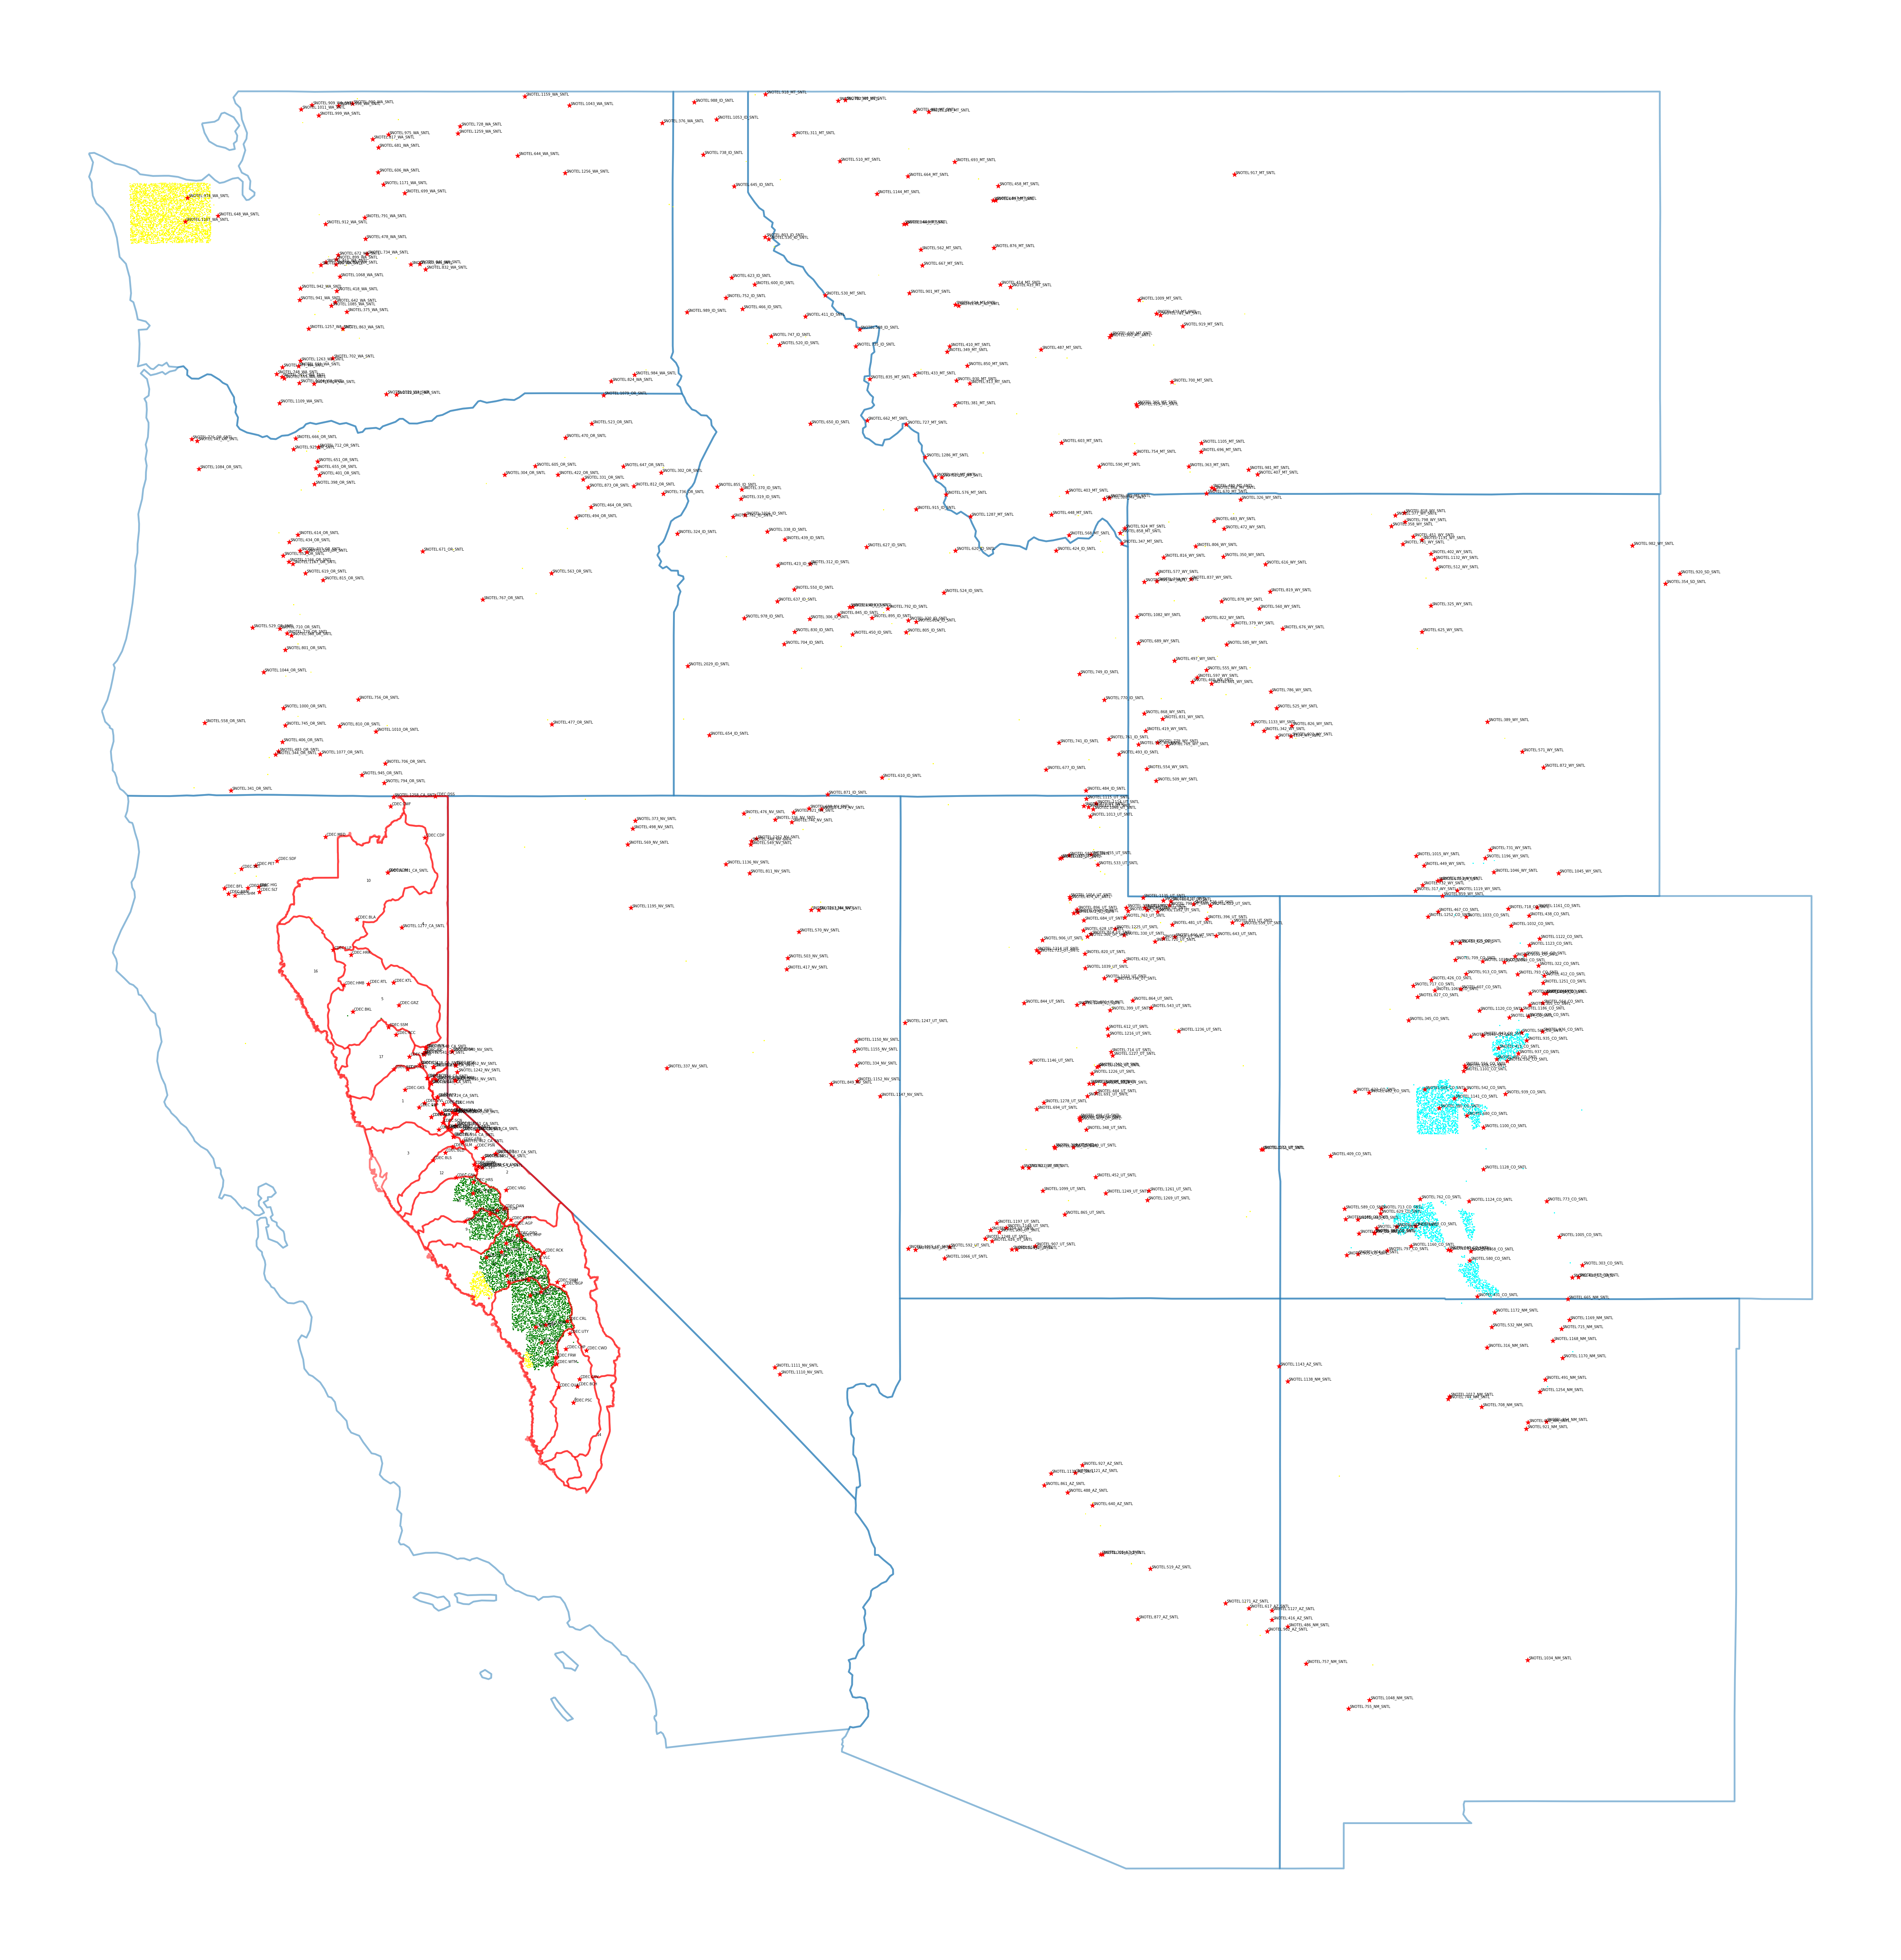

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects

fig, ax = plt.subplots(figsize = (100,100))

states = gpd.read_file('/content/drive/MyDrive/snowcapstone team spring 2022/Competition_Data/USMap/cb_2018_us_state_20m.shp')
states = states.to_crs("EPSG:4326")
states = states[states['STUSPS'].isin(['WA', 'OR', 'CA', 'NV', 'MT', 'ID', 'WY', 'NM', 'CO' ,'UT', 'AZ'])]
statemap = states.boundary.plot(ax=ax, linewidth=5, zorder = 1,alpha=.5)

gpd.GeoDataFrame(labels[labels['region']=='sierras']["geometry"]).to_crs(states.crs).plot(ax=ax, facecolor="green", edgecolor='green')
gpd.GeoDataFrame(labels[labels['region']=='central rockies']["geometry"]).to_crs(states.crs).plot(ax=ax, facecolor="cyan", edgecolor='cyan')
gpd.GeoDataFrame(labels[labels['region']=='other']["geometry"]).to_crs(states.crs).plot(ax=ax, facecolor="yellow", edgecolor='yellow')

#gpd.GeoDataFrame(labels[labels['cell_id']=='02cf33c2-c8e2-48b9-bf72-92506e97e251']["geometry"]).to_crs(states.crs).buffer(4).plot(ax=ax, facecolor="cyan", edgecolor='cyan')
g_sierra.geometry.to_crs(states.crs).plot(ax=ax, linewidth=5, zorder = 2,alpha=.5,edgecolor='red',facecolor='None')

#g_washington.geometry.to_crs(states.crs).plot(ax=ax, linewidth=5, zorder = 2,alpha=.5,edgecolor='purple')

#Sierra Nevada basin boundaries
b_sierra.geometry.to_crs(states.crs).plot(ax=ax, linewidth=5,zorder=2, alpha=.5, edgecolor='red',facecolor='None')
for x, y, label in zip(b_sierra.geometry.to_crs(states.crs).centroid.x, b_sierra.geometry.to_crs(states.crs).centroid.y, b_sierra.FID):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points",color='black')


gdf["geometry"].plot(ax = ax, markersize = 200, color = 'red',marker = '*', zorder = 2)
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf.station_id):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points",color='black')

plt.autoscale(False)
ax.axis("off")
fig.set_facecolor('None')
plt.savefig('transparent_map.png',transparent=True)

plt.show()

In [ ]:
#(East Basins)
east_basins = [14,8,2,13,4] 
cal_gdf = gdf[gdf['state']=='California'].copy()

#Assuming rainshadow in east basins
rs = []
for i in range(len(cal_gdf)):
  val=0
  for j in east_basins:
    #j-1 because FID is 1 off from index
    if b_sierra.iloc[j-1].geometry.contains(cal_gdf.iloc[i].geometry):
      #Increment value if Station point is in boundary of an east basin
      val+=1
  #If point was found to be in one of the east basins, add 1 to rs variable. Otherwise add 0
  if val >= 1:
    rs.append(1)
  else:
    rs.append(0)

cal_gdf['rainshadow']=rs

cal_gdf.head()


,station_id,name,elevation_m,latitude,longitude,state,geometry,rainshadow
0,CDEC:ADM,Adin Mountain,1889.76,41.237000,-120.792000,California,POINT (-120.79200 41.23700),0
1,CDEC:AGP,Agnew Pass,2880.36,37.726631,-119.141731,California,POINT (-119.14173 37.72663),0
2,CDEC:ALP,Alpha (Smud),2316.48,38.804192,-120.215652,California,POINT (-120.21565 38.80419),0
3,CDEC:BCB,Blackcap Basin,3139.44,37.066685,-118.773010,California,POINT (-118.77301 37.06668),0
4,CDEC:BCH,Beach Meadows,2331.72,36.126095,-118.293457,California,POINT (-118.29346 36.12609),0


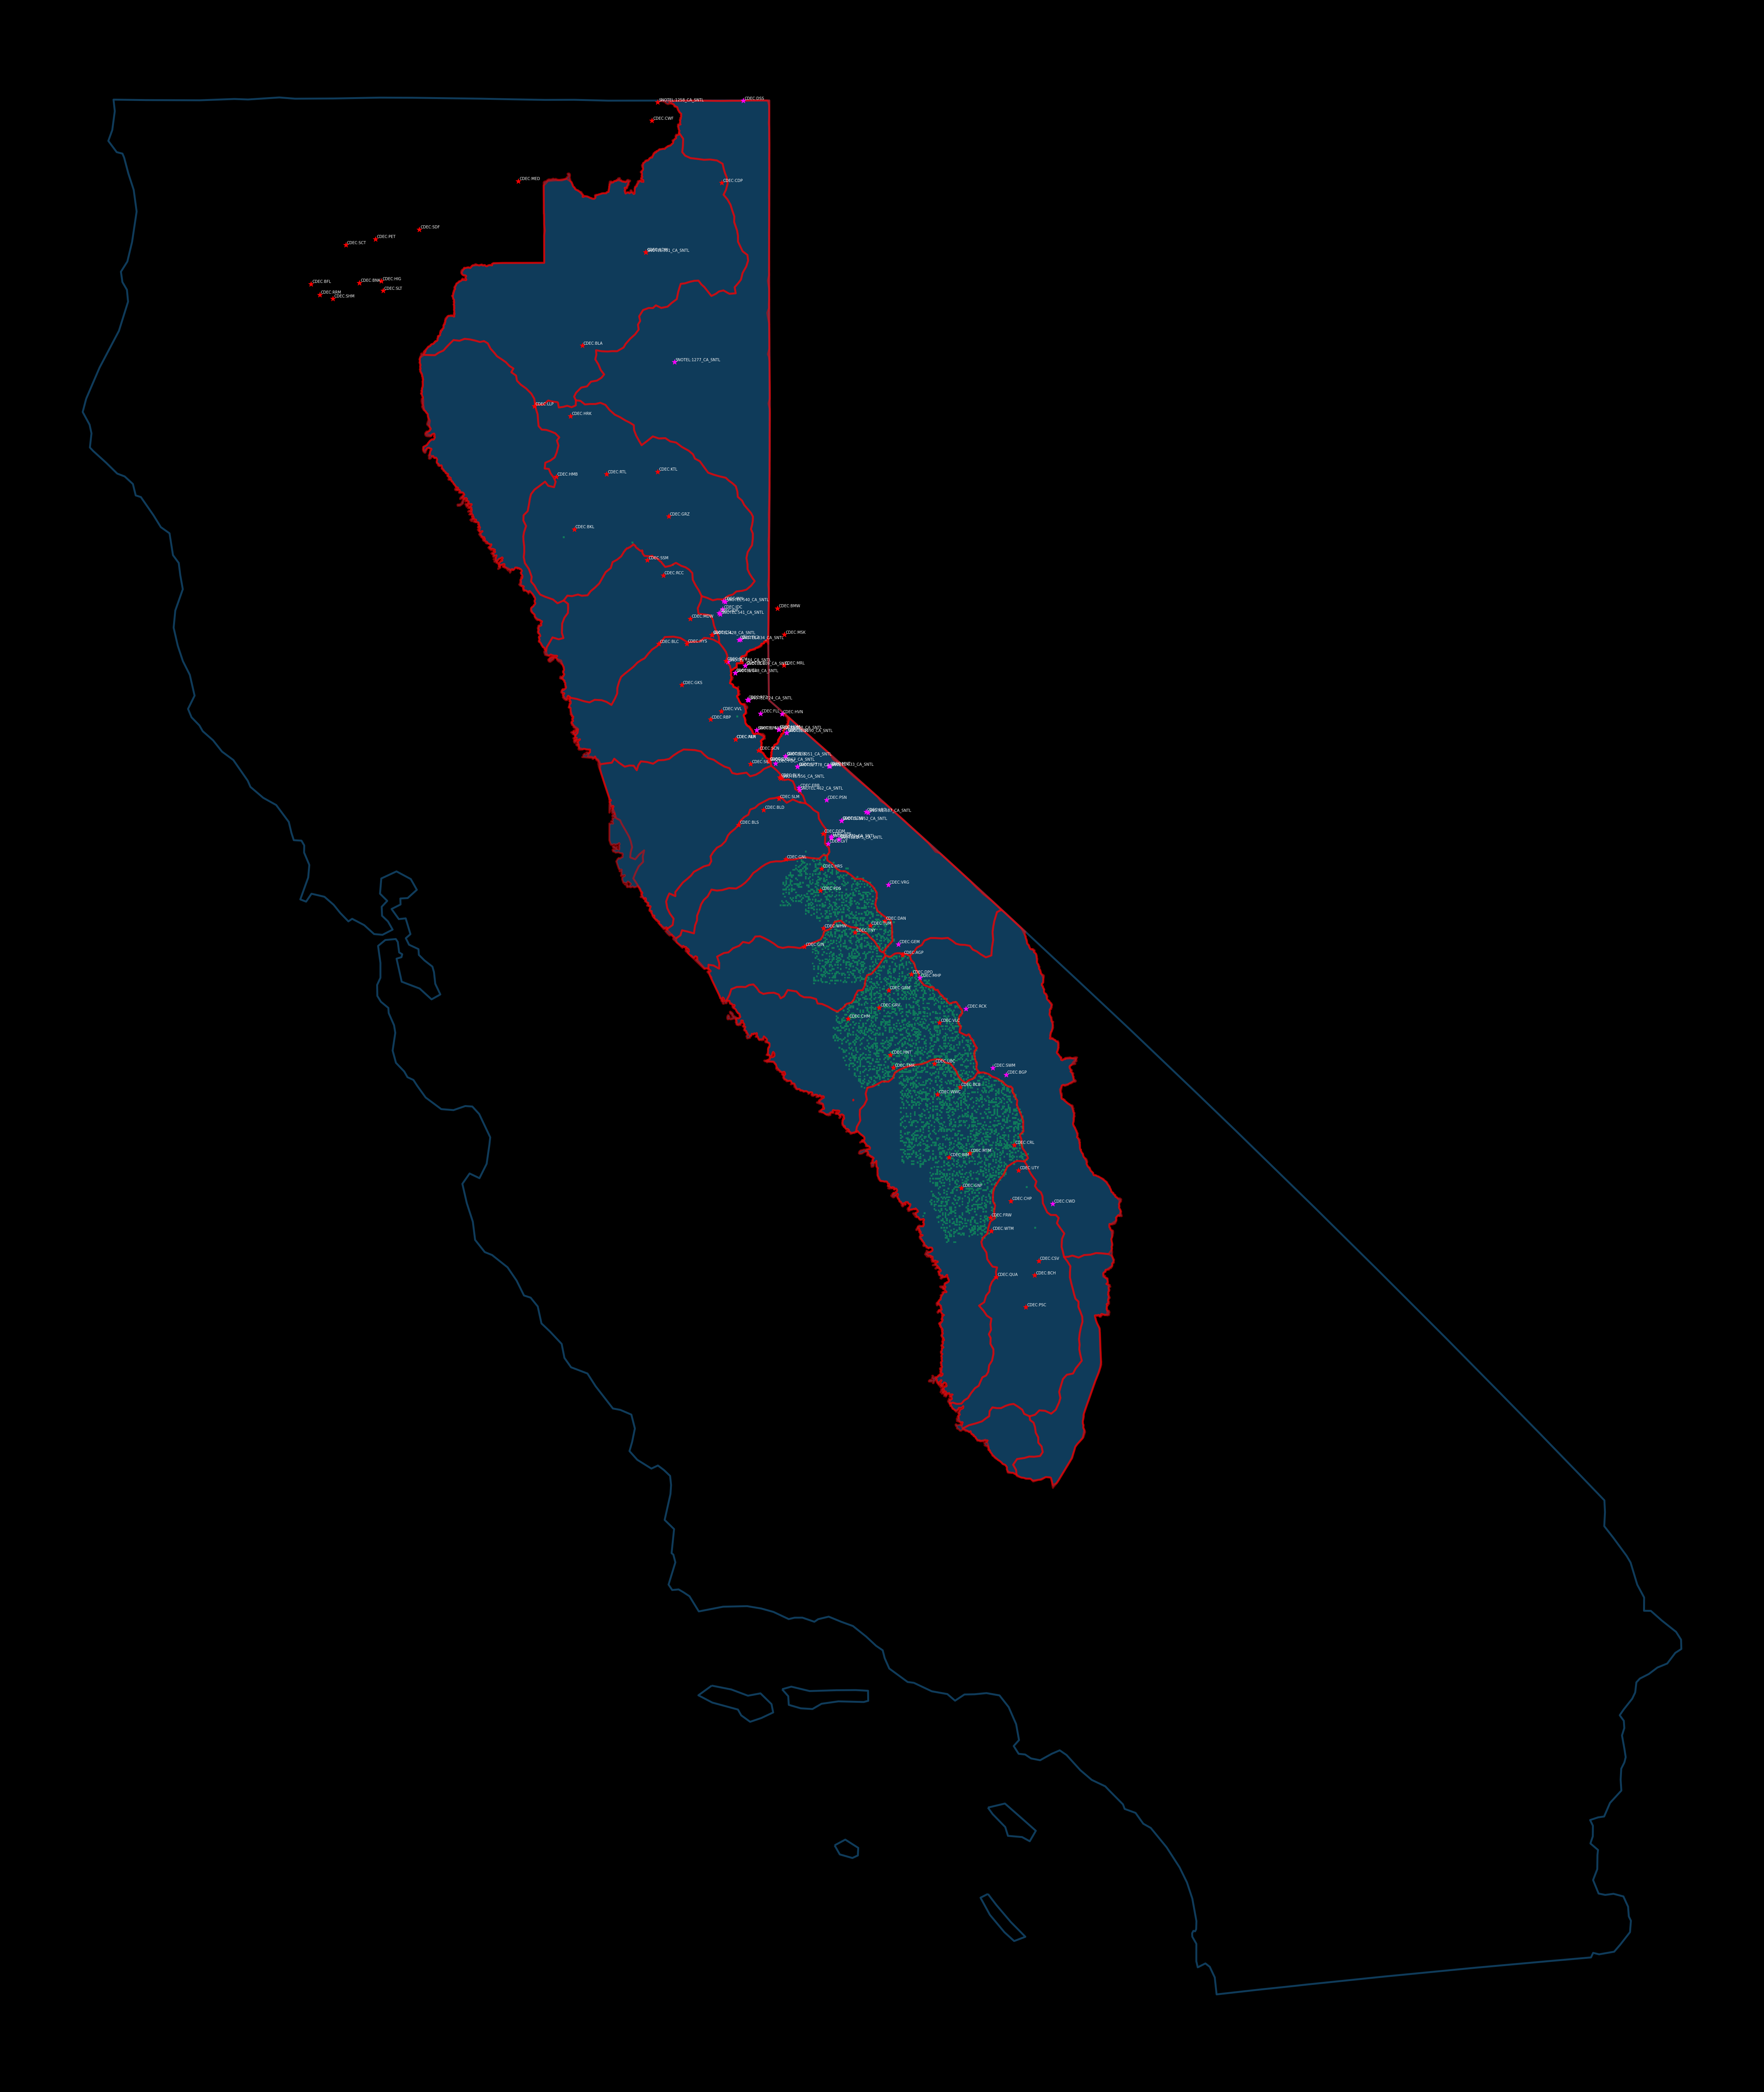

In [ ]:
fig, ax = plt.subplots(figsize = (100,100))

states = gpd.read_file('/content/drive/MyDrive/snowcapstone team spring 2022/Competition_Data/USMap/cb_2018_us_state_20m.shp')
states = states.to_crs("EPSG:4326")
states = states[states['STUSPS'].isin(['CA'])]
statemap = states.boundary.plot(ax=ax, linewidth=5, zorder = 1,alpha=.5)

gpd.GeoDataFrame(labels[labels['region']=='sierras']["geometry"]).to_crs(states.crs).plot(ax=ax, facecolor="green", edgecolor='green')
#gpd.GeoDataFrame(labels[labels['region']=='central rockies']["geometry"]).to_crs(states.crs).plot(ax=ax, facecolor="cyan", edgecolor='cyan')
#gpd.GeoDataFrame(labels[labels['region']=='other']["geometry"]).to_crs(states.crs).plot(ax=ax, facecolor="yellow", edgecolor='yellow')

#gpd.GeoDataFrame(labels[labels['cell_id']=='02cf33c2-c8e2-48b9-bf72-92506e97e251']["geometry"]).to_crs(states.crs).buffer(4).plot(ax=ax, facecolor="cyan", edgecolor='cyan')
g_sierra.geometry.to_crs(states.crs).plot(ax=ax, linewidth=5, zorder = 2,alpha=.5,edgecolor='red')

#g_washington.geometry.to_crs(states.crs).plot(ax=ax, linewidth=5, zorder = 2,alpha=.5,edgecolor='purple')

#Sierra Nevada basin boundaries
b_sierra.geometry.to_crs(states.crs).plot(ax=ax, linewidth=5,zorder=2, alpha=.5, edgecolor='red',facecolor='None')
#for x, y, label in zip(b_sierra.geometry.to_crs(states.crs).centroid.x, b_sierra.geometry.to_crs(states.crs).centroid.y, b_sierra.FID):
#|    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points",color='plum')


cal_gdf[cal_gdf['rainshadow']==1]["geometry"].plot(ax = ax, markersize = 200, color = 'fuchsia',marker = '*', zorder = 2)
cal_gdf[cal_gdf['rainshadow']==0]["geometry"].plot(ax = ax, markersize = 200, color = 'red',marker = '*', zorder = 2)
for x, y, label in zip(cal_gdf.geometry.x, cal_gdf.geometry.y, cal_gdf.station_id):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points",color='white')

plt.autoscale(False)
ax.axis("off")
fig.set_facecolor('black')
plt.show()

In [ ]:
from sklearn.neighbors import BallTree
import numpy as np

#Adapted from AutoGIS| University of Helsinki
# https://automating-gis-processes.github.io/site/notebooks/L3/nearest-neighbor-faster.html
def get_knearest(src_points, candidates, knn=1):
  '''
  K nearest neighbors for every source point given candidate points
  '''
  #Make candidates BallTree format
  tree = BallTree(candidates,leaf_size=15,metric='haversine')

  #Find closest points
  distances, indices = tree.query(src_points, k=knn)

  #Transpose into arrays
  distances = distances.transpose()
  indices = indices.transpose()

  #neighbor_idx = []
  #neighbor_dist = []
   
  return(indices, distances)
  #Iterate for k neighbors
  #for i in range(knn):
  #  neighbor_idx.append(indices[i])
  #  neighbor_dist.append(distances[i])
  #Return list of lists in order of KNN
  #return(neighbor_idx,neighbor_dist)



  return distances,indices

def nearest_neighbor(left_gdf, right_gdf, return_dist=False, knn=1):
    """
    For each point in left_gdf, find closest point in right GeoDataFrame and return them.

    NOTICE: Assumes that the input Points are in WGS84 projection (lat/lon).
    """

    left_geom_col = left_gdf.geometry.name
    right_geom_col = right_gdf.geometry.name

    # Ensure that index in right gdf is formed of sequential numbers
    right = right_gdf.copy().reset_index(drop=True)

    # Parse coordinates from points and insert them into a numpy array as RADIANS
    #For left radians, data is in polygon format, so apply meter crs, get centroid, and revert
    left_radians = np.array(left_gdf[left_geom_col].to_crs('epsg:4087').centroid.to_crs("EPSG:4326").apply(lambda geom: (geom.x * np.pi / 180, geom.y * np.pi / 180)).to_list())
    right_radians = np.array(right[right_geom_col].apply(lambda geom: (geom.x * np.pi / 180, geom.y * np.pi / 180)).to_list())


    # Find the nearest points
    # -----------------------
    # closest ==> index in right_gdf that corresponds to the closest point
    # dist ==> distance between the nearest neighbors (in meters)

    closest, dist = get_knearest(src_points=left_radians, candidates=right_radians, knn=knn)

    #return(closest,dist)
    
    closest_points = gpd.GeoDataFrame()
    
    #Loop for knn
    for i in range(knn):
      # Return points from right GeoDataFrame that are closest to points in left GeoDataFrame
      #Loop to return closest starting from 0 idx
      #print(i)
      #print(right.loc[closest[i]].values)
      #Get values for station_id, lat/long, elevation, state, geometry
      closest_points['station_id_'+str(i)] = right['station_id'].loc[closest[i]].values
      #closest_points['latitude_'+str(i)] = right['latitude'].loc[closest[i]].values
      #closest_points['longitude_'+str(i)] = right['longitude'].loc[closest[i]].values
      closest_points['elevation_m_'+str(i)] = right['elevation_m'].loc[closest[i]].values
      #closest_points['state_'+str(i)] = right['state'].loc[closest[i]].values
      #closest_points['geometry_'+str(i)] = right['geometry'].loc[closest[i]].values

      # Ensure that the index corresponds the one in left_gdf
      #closest_points = closest_points.reset_index(drop=True)

      # Add distance if requested
      if return_dist:
        # Convert to meters from radians
        earth_radius = 6371000  # meters
        closest_points['distance_'+str(i)] = dist[i] * earth_radius

    return closest_points




In [ ]:
metadata

'/content/drive/MyDrive/snowcapstone team spring 2022/Competition_Data/ground_measures_metadata.csv'

In [ ]:
knn=5
closest_stations = nearest_neighbor(labels, gdf, return_dist=True,knn=knn*3)

In [ ]:
closest_stations[-5:]

,station_id_0,elevation_m_0,distance_0,station_id_1,elevation_m_1,distance_1,station_id_2,elevation_m_2,distance_2,station_id_3,elevation_m_3,distance_3,station_id_4,elevation_m_4,distance_4,station_id_5,elevation_m_5,distance_5,station_id_6,elevation_m_6,distance_6,station_id_7,elevation_m_7,distance_7,station_id_8,elevation_m_8,distance_8,station_id_9,elevation_m_9,distance_9,station_id_10,elevation_m_10,distance_10,station_id_11,elevation_m_11,distance_11,station_id_12,elevation_m_12,distance_12,station_id_13,elevation_m_13,distance_13,station_id_14,elevation_m_14,distance_14
91485,SNOTEL:303_CO_SNTL,3048.000000,44705.614579,SNOTEL:857_CO_SNTL,3115.055908,48397.053191,SNOTEL:1005_CO_SNTL,3246.120117,49335.692566,SNOTEL:430_CO_SNTL,3200.399902,50251.468408,SNOTEL:773_CO_SNTL,3291.840088,57662.045509,SNOTEL:665_NM_SNTL,3230.879883,58370.864360,SNOTEL:936_CO_SNTL,3230.879883,61731.293287,SNOTEL:663_CO_SNTL,3020.568115,62011.372112,SNOTEL:1169_NM_SNTL,3078.479980,63335.765787,SNOTEL:564_CO_SNTL,2956.560059,64865.301016,SNOTEL:838_CO_SNTL,3139.439941,64985.383762,SNOTEL:412_CO_SNTL,2621.280029,67128.575582,SNOTEL:1251_CO_SNTL,2932.176025,67580.669348,SNOTEL:715_NM_SNTL,3002.280029,69920.703895,SNOTEL:322_CO_SNTL,2895.600098,75882.197869
91486,SNOTEL:531_CO_SNTL,3474.719971,5996.352572,SNOTEL:939_CO_SNTL,3157.728027,8826.109690,SNOTEL:415_CO_SNTL,3215.639893,8836.185006,SNOTEL:485_CO_SNTL,3474.719971,9834.235313,SNOTEL:1014_CO_SNTL,2724.912109,17834.990414,SNOTEL:937_CO_SNTL,3230.879883,22651.529819,SNOTEL:505_CO_SNTL,3383.280029,28842.335725,SNOTEL:842_CO_SNTL,3139.439941,31473.627969,SNOTEL:1186_CO_SNTL,3398.520020,32178.948221,SNOTEL:869_CO_SNTL,2907.791992,32298.286918,SNOTEL:1100_CO_SNTL,3212.592041,34149.650597,SNOTEL:793_CO_SNTL,2657.855957,35439.576024,SNOTEL:935_CO_SNTL,3340.607910,35528.909243,SNOTEL:1031_CO_SNTL,3133.343994,38007.550557,SNOTEL:1120_CO_SNTL,3206.496094,39014.649707
91487,SNOTEL:739_CO_SNTL,2773.679932,10529.421855,SNOTEL:465_CO_SNTL,3048.000000,10666.874042,SNOTEL:386_CO_SNTL,2706.624023,14224.593191,SNOTEL:387_CO_SNTL,2718.815918,14490.086408,SNOTEL:904_CO_SNTL,3287.268066,16444.146310,SNOTEL:780_CO_SNTL,3249.167969,16861.802394,SNOTEL:629_CO_SNTL,3060.191895,22205.177904,SNOTEL:713_CO_SNTL,3413.760010,23818.271535,SNOTEL:1185_CO_SNTL,3529.583984,28684.446263,SNOTEL:905_CO_SNTL,3048.000000,29921.293268,SNOTEL:589_CO_SNTL,2926.080078,30167.780461,SNOTEL:797_CO_SNTL,3413.760010,34338.198712,SNOTEL:682_CO_SNTL,3035.808105,43043.940419,SNOTEL:622_CO_SNTL,3048.000000,45724.760575,SNOTEL:327_CO_SNTL,3535.679932,46075.039685
91488,SNOTEL:388_OR_SNTL,1554.479980,18573.908304,SNOTEL:729_OR_SNTL,1286.255981,19632.444790,SNOTEL:1167_OR_SNTL,996.695984,23827.553779,SNOTEL:710_OR_SNTL,816.864014,24883.416906,SNOTEL:619_OR_SNTL,1453.895996,25217.718921,SNOTEL:1166_OR_SNTL,1438.656006,26119.447811,SNOTEL:801_OR_SNTL,1709.927979,29243.905890,SNOTEL:552_OR_SNTL,1072.895996,32548.388934,SNOTEL:733_OR_SNTL,1139.952026,32886.768417,SNOTEL:526_OR_SNTL,1459.991943,36148.650964,SNOTEL:434_OR_SNTL,1124.712036,37250.526121,SNOTEL:614_OR_SNTL,789.432007,41367.973563,SNOTEL:815_OR_SNTL,1734.312012,45493.830139,SNOTEL:1044_OR_SNTL,987.552002,59422.316976,SNOTEL:529_OR_SNTL,1502.663940,61537.924572
91489,SNOTEL:328_MT_SNTL,2392.679932,21578.391730,SNOTEL:385_MT_SNTL,2743.199951,24044.512064,SNOTEL:858_MT_SNTL,2072.639893,27138.485034,SNOTEL:347_MT_SNTL,2490.216064,28698.550393,SNOTEL:924_MT_SNTL,2042.160034,33864.961445,SNOTEL:590_MT_SNTL,2706.624023,34912.760185,SNOTEL:568_MT_SNTL,2255.520020,49487.689003,SNOTEL:403_MT_SNTL,2621.280029,56816.501040,SNOTEL:1082_WY_SNTL,2822.447998,56920.503005,SNOTEL:770_ID_SNTL,2072.639893,59591.528778,SNOTEL:749_ID_SNTL,2026.920044,59881.454399,SNOTEL:754_MT_SNTL,2468.879883,61622.095786,SNOTEL:499_WY_SNTL,2214.372070,62277.435636,SNOTEL:689_WY_SNTL,2499.360107,63781.120188,SNOTEL:424_ID_SNTL,2103.120117,67791.100629


In [ ]:
len(closest_stations) == len(labels)

True

In [ ]:
labels_joined = labels.join(closest_stations)
labels_joined.head()

,cell_id,date,SWE,region,geometry,station_id_0,elevation_m_0,distance_0,station_id_1,elevation_m_1,distance_1,station_id_2,elevation_m_2,distance_2,station_id_3,elevation_m_3,distance_3,station_id_4,elevation_m_4,distance_4,station_id_5,elevation_m_5,distance_5,station_id_6,elevation_m_6,distance_6,station_id_7,elevation_m_7,distance_7,station_id_8,elevation_m_8,distance_8,station_id_9,elevation_m_9,distance_9,station_id_10,elevation_m_10,distance_10,station_id_11,elevation_m_11,distance_11,station_id_12,elevation_m_12,distance_12,station_id_13,elevation_m_13,distance_13,station_id_14,elevation_m_14,distance_14
0,00c4db22-a423-41a4-ada6-a8b1b04153a4,2013-01-01,12.7,other,"POLYGON ((-121.93492 41.16327, -121.93492 41.1...",CDEC:SDF,2057.400000,35830.663752,CDEC:MED,2042.160000,44197.665002,CDEC:SLT,1737.360000,60559.904895,CDEC:HIG,1837.944000,61556.289610,CDEC:LLP,2541.422400,63049.987826,CDEC:PET,2179.320000,65915.463823,CDEC:BNK,1965.960000,77090.828654,SNOTEL:1077_OR_SNTL,2081.783936,78548.878090,SNOTEL:483_OR_SNTL,1819.656006,81764.328964,SNOTEL:344_OR_SNTL,1609.343994,81815.042899,SNOTEL:406_OR_SNTL,1810.511963,84854.210283,CDEC:BLA,2148.840000,85425.246647,CDEC:HRK,1889.760000,85798.476463,CDEC:SCT,1798.320000,86966.447901,CDEC:HMB,1981.200000,88333.028458
1,018cf1a1-f945-4097-9c47-0c4690538bb5,2013-01-01,20.4,sierras,"POLYGON ((-120.61440 39.67242, -120.61440 39.6...",CDEC:RCC,1975.104000,7440.051535,CDEC:GRZ,2103.120000,13965.946011,CDEC:SSM,1920.240000,18204.349042,CDEC:MDW,2194.560000,19769.440121,CDEC:HYS,2011.680000,24418.432323,CDEC:BLC,1609.344000,24565.645730,CDEC:KTL,2225.040000,28408.816672,SNOTEL:428_CA_SNTL,2101.291260,34181.135825,CDEC:CSL,2103.120000,34299.701320,CDEC:GKS,1706.880000,34611.011285,CDEC:IDP,2575.560000,35697.583274,SNOTEL:541_CA_SNTL,2541.422363,36739.258954,CDEC:INN,1981.200000,37659.464330,CDEC:IDC,2133.600000,37778.827599,SNOTEL:540_CA_SNTL,1961.692749,38869.716927
2,01be2cc7-ef77-4e4d-80ed-c4f8139162c3,2013-01-01,37.0,sierras,"POLYGON ((-119.60829 38.27575, -119.60829 38.2...",CDEC:LVT,2926.080000,926.790382,SNOTEL:771_CA_SNTL,2673.095947,2193.656700,CDEC:SPS,2667.000000,2498.345533,CDEC:DDM,2819.400000,5422.452856,CDEC:LVM,2194.560000,6903.841795,SNOTEL:575_CA_SNTL,2193.950439,6986.658962,CDEC:HRS,2560.320000,8627.221253,CDEC:SDW,2838.602400,10758.451681,SNOTEL:1052_CA_SNTL,2838.602295,10791.312392,CDEC:PSN,2407.920000,12353.453186,CDEC:PDS,2331.720000,14270.474575,SNOTEL:633_CA_SNTL,2531.668701,21378.670338,CDEC:MNT,2545.080000,21470.623797,CDEC:WHW,2407.920000,23478.639826,SNOTEL:462_CA_SNTL,2639.872803,26027.305142
3,02c3ec4a-8de4-4284-9ec1-5a942d3d098e,2013-01-01,2.3,other,"POLYGON ((-107.19357 44.57879, -107.19357 44.5...",SNOTEL:1131_WY_SNTL,2703.575928,2507.416431,SNOTEL:451_WY_SNTL,2706.624023,10823.371119,SNOTEL:402_WY_SNTL,3005.327881,16368.460985,SNOTEL:1132_WY_SNTL,2657.855957,21886.525866,SNOTEL:798_WY_SNTL,2706.624023,22966.188071,SNOTEL:818_WY_SNTL,2093.976074,24786.565280,SNOTEL:751_WY_SNTL,2919.983887,25873.487888,SNOTEL:512_WY_SNTL,2548.127930,26500.888464,SNOTEL:325_WY_SNTL,2499.360107,27359.299209,SNOTEL:625_WY_SNTL,2365.248047,31428.365843,SNOTEL:377_WY_SNTL,2401.823975,37444.596904,SNOTEL:358_WY_SNTL,2849.879883,42713.703952,SNOTEL:1015_WY_SNTL,2392.679932,104951.424955,SNOTEL:449_WY_SNTL,2706.624023,107740.714007,SNOTEL:732_WY_SNTL,2484.120117,114030.981246
4,02cf33c2-c8e2-48b9-bf72-92506e97e251,2013-01-01,8.0,central rockies,"POLYGON ((-106.60068 40.39461, -106.60068 40.4...",SNOTEL:913_CO_SNTL,2816.352051,5493.320755,SNOTEL:825_CO_SNTL,3200.399902,9118.444617,SNOTEL:607_CO_SNTL,2706.624023,12497.633603,SNOTEL:1033_CO_SNTL,2846.832031,12653.991577,SNOTEL:709_CO_SNTL,2865.120117,15065.268650,SNOTEL:457_CO_SNTL,2560.320068,20060.458140,SNOTEL:1119_WY_SNTL,2993.135986,24210.162398,SNOTEL:1030_CO_SNTL,3340.607910,24924.751757,SNOTEL:1040_CO_SNTL,2889.503906,26146.474292,SNOTEL:1120_CO_SNTL,3206.496094,26231.456739,SNOTEL:556_CO_SNTL,2926.080078,34368.749740,SNOTEL:65

In [ ]:
train.head()

,station_id,date,SWE
0,CDEC:ADM,2013-01-01,5.9
1,SNOTEL:628_UT_SNTL,2013-01-01,9.8
2,SNOTEL:629_CO_SNTL,2013-01-01,3.6
3,SNOTEL:633_CA_SNTL,2013-01-01,9.4
4,SNOTEL:637_ID_SNTL,2013-01-01,6.9


In [ ]:
#Calculate average SWE from KNN (ALSO ADD ELEVATION HERE!!!!!!)
SWE_names=[]
elevation_names=[]
reordered_columns = ['cell_id', 'date', 'SWE', 'region', 'geometry','local_elevation_mean', 'SWE_local_mean','SWE_inverse_dist_mean','SWE_local_median','SWE_local_min','SWE_local_max']
no_na = []
for i in range(knn):
  reordered_columns.extend(['station_id_'+str(i),'elevation_m_'+str(i),'distance_'+str(i),'SWE_'+str(i)])
  SWE_names.append('SWE_'+str(i))
  elevation_names.append('elevation_m_'+str(i))


In [ ]:

idx = 0
for i in range(knn*3):
  train
  if i == 0:
    tmp_merged = pd.merge(labels_joined, train, how="left", left_on=['station_id_'+str(i), 'date'], right_on=['station_id','date'],suffixes=(None,'_'+str(i))).drop(columns= ['station_id'])
  else:
    tmp_merged = pd.merge(tmp_merged, train, how="left", left_on=['station_id_'+str(i), 'date'], right_on=['station_id','date'],suffixes=(None,'_'+str(i))).drop(columns= ['station_id'])


In [ ]:
tmp_merged.head()

,cell_id,date,SWE,region,geometry,station_id_0,elevation_m_0,distance_0,station_id_1,elevation_m_1,distance_1,station_id_2,elevation_m_2,distance_2,station_id_3,elevation_m_3,distance_3,station_id_4,elevation_m_4,distance_4,station_id_5,elevation_m_5,distance_5,station_id_6,elevation_m_6,distance_6,station_id_7,elevation_m_7,distance_7,station_id_8,elevation_m_8,distance_8,station_id_9,elevation_m_9,distance_9,station_id_10,elevation_m_10,distance_10,station_id_11,elevation_m_11,distance_11,station_id_12,elevation_m_12,distance_12,station_id_13,elevation_m_13,distance_13,station_id_14,elevation_m_14,distance_14,SWE_0,SWE_1,SWE_2,SWE_3,SWE_4,SWE_5,SWE_6,SWE_7,SWE_8,SWE_9,SWE_10,SWE_11,SWE_12,SWE_13,SWE_14
0,00c4db22-a423-41a4-ada6-a8b1b04153a4,2013-01-01,12.7,other,"POLYGON ((-121.93492 41.16327, -121.93492 41.1...",CDEC:SDF,2057.400000,35830.663752,CDEC:MED,2042.160000,44197.665002,CDEC:SLT,1737.360000,60559.904895,CDEC:HIG,1837.944000,61556.289610,CDEC:LLP,2541.422400,63049.987826,CDEC:PET,2179.320000,65915.463823,CDEC:BNK,1965.960000,77090.828654,SNOTEL:1077_OR_SNTL,2081.783936,78548.878090,SNOTEL:483_OR_SNTL,1819.656006,81764.328964,SNOTEL:344_OR_SNTL,1609.343994,81815.042899,SNOTEL:406_OR_SNTL,1810.511963,84854.210283,CDEC:BLA,2148.840000,85425.246647,CDEC:HRK,1889.760000,85798.476463,CDEC:SCT,1798.320000,86966.447901,CDEC:HMB,1981.200000,88333.028458,19.44,20.04,12.84,13.68,NaN,17.52,15.00,12.4,10.4,7.70,11.40,4.92,10.68,12.72,15.84
1,018cf1a1-f945-4097-9c47-0c4690538bb5,2013-01-01,20.4,sierras,"POLYGON ((-120.61440 39.67242, -120.61440 39.6...",CDEC:RCC,1975.104000,7440.051535,CDEC:GRZ,2103.120000,13965.946011,CDEC:SSM,1920.240000,18204.349042,CDEC:MDW,2194.560000,19769.440121,CDEC:HYS,2011.680000,24418.432323,CDEC:BLC,1609.344000,24565.645730,CDEC:KTL,2225.040000,28408.816672,SNOTEL:428_CA_SNTL,2101.291260,34181.135825,CDEC:CSL,2103.120000,34299.701320,CDEC:GKS,1706.880000,34611.011285,CDEC:IDP,2575.560000,35697.583274,SNOTEL:541_CA_SNTL,2541.422363,36739.258954,CDEC:INN,1981.200000,37659.464330,CDEC:IDC,2133.600000,37778.827599,SNOTEL:540_CA_SNTL,1961.692749,38869.716927,16.52,13.32,NaN,25.02,8.39,NaN,14.16,18.0,18.0,11.16,32.20,33.80,5.00,6.50,5.10
2,01be2cc7-ef77-4e4d-80ed-c4f8139162c3,2013-01-01,37.0,sierras,"POLYGON ((-119.60829 38.27575, -119.60829 38.2...",CDEC:LVT,2926.080000,926.790382,SNOTEL:771_CA_SNTL,2673.095947,2193.656700,CDEC:SPS,2667.000000,2498.345533,CDEC:DDM,2819.400000,5422.452856,CDEC:LVM,2194.560000,6903.841795,SNOTEL:575_CA_SNTL,2193.950439,6986.658962,CDEC:HRS,2560.320000,8627.221253,CDEC:SDW,2838.602400,10758.451681,SNOTEL:1052_CA_SNTL,2838.602295,10791.312392,CDEC:PSN,2407.920000,12353.453186,CDEC:PDS,2331.720000,14270.474575,SNOTEL:633_CA_SNTL,2531.668701,21378.670338,CDEC:MNT,2545.080000,21470.623797,CDEC:WHW,2407.920000,23478.639826,SNOTEL:462_CA_SNTL,2639.872803,26027.305142,37.00,16.10,16.20,19.92,5.60,5.60,35.20,11.4,11.4,NaN,25.31,9.40,9.40,19.30,20.30
3,02c3ec4a-8de4-4284-9ec1-5a942d3d098e,2013-01-01,2.3,other,"POLYGON ((-107.19357 44.57879, -107.19357 44.5...",SNOTEL:1131_WY_SNTL,2703.575928,2507.416431,SNOTEL:451_WY_SNTL,2706.624023,10823.371119,SNOTEL:402_WY_SNTL,3005.327881,16368.460985,SNOTEL:1132_WY_SNTL,2657.855957,21886.525866,SNOTEL:798_WY_SNTL,2706.624023,22966.188071,SNOTEL:818_WY_SNTL,2093.976074,24786.565280,SNOTEL:751_WY_SNTL,2919.983887,25873.487888,SNOTEL:512_WY_SNTL,2548.127930,26500.888464,SNOTEL:325_WY_SNTL,2499.360107,27359.299209,SNOTEL:625_WY_SNTL,2365.248047,31428.365843,SNOTEL:377_WY_SNTL,2401.823975,37444.596904,SNOTEL:358_WY_SNTL,2849.879883,42713.703952,SNOTEL:1015_WY_SNTL,2392.679932,104951.424955,SNOTEL:449_WY_SNTL,2706.624023,107740.714007,SNOTEL:732_WY_SNTL,2484.120117,114030.981246,3.10,3.70,4.90,1.70,4.00,0.70,7.30,2.8,4.1,3.40,2.60,6.00,5.00,6.30,5.30
4,02cf33c2-c8e2-48b9-bf72-92506e97e251,2013-01-01,8.0,central rockies,"POLYGON ((-106.60068 40.39461, -106.60068 40.4...",SNOTEL:913_CO_SNTL,2816.352051,5493.320755,SNOTEL:825_CO_SNTL,3200.399902,9118.444

In [ ]:
#Filter out nearest neighbors with NaN, get 5 closest WITH VALUES
filtered = []
for idx,row in tmp_merged.iterrows():
  index = []
  values = []
  i=0
  counter=0
  while i<knn:
    if not pd.isna(row['SWE_'+str(counter)]):
      i+=1
      index.append(counter)
    counter+=1
  for j in index:
    values.extend([row['station_id_'+str(j)], row['elevation_m_'+str(j)], row['distance_'+str(j)], row['SWE_'+str(j)]])
  filtered.append(values)



In [ ]:
tmp_merged.head()

,cell_id,date,SWE,region,geometry,station_id_0,elevation_m_0,distance_0,station_id_1,elevation_m_1,distance_1,station_id_2,elevation_m_2,distance_2,station_id_3,elevation_m_3,distance_3,station_id_4,elevation_m_4,distance_4,station_id_5,elevation_m_5,distance_5,station_id_6,elevation_m_6,distance_6,station_id_7,elevation_m_7,distance_7,station_id_8,elevation_m_8,distance_8,station_id_9,elevation_m_9,distance_9,station_id_10,elevation_m_10,distance_10,station_id_11,elevation_m_11,distance_11,station_id_12,elevation_m_12,distance_12,station_id_13,elevation_m_13,distance_13,station_id_14,elevation_m_14,distance_14,SWE_0,SWE_1,SWE_2,SWE_3,SWE_4,SWE_5,SWE_6,SWE_7,SWE_8,SWE_9,SWE_10,SWE_11,SWE_12,SWE_13,SWE_14
0,00c4db22-a423-41a4-ada6-a8b1b04153a4,2013-01-01,12.7,other,"POLYGON ((-121.93492 41.16327, -121.93492 41.1...",CDEC:SDF,2057.400000,35830.663752,CDEC:MED,2042.160000,44197.665002,CDEC:SLT,1737.360000,60559.904895,CDEC:HIG,1837.944000,61556.289610,CDEC:LLP,2541.422400,63049.987826,CDEC:PET,2179.320000,65915.463823,CDEC:BNK,1965.960000,77090.828654,SNOTEL:1077_OR_SNTL,2081.783936,78548.878090,SNOTEL:483_OR_SNTL,1819.656006,81764.328964,SNOTEL:344_OR_SNTL,1609.343994,81815.042899,SNOTEL:406_OR_SNTL,1810.511963,84854.210283,CDEC:BLA,2148.840000,85425.246647,CDEC:HRK,1889.760000,85798.476463,CDEC:SCT,1798.320000,86966.447901,CDEC:HMB,1981.200000,88333.028458,19.44,20.04,12.84,13.68,NaN,17.52,15.00,12.4,10.4,7.70,11.40,4.92,10.68,12.72,15.84
1,018cf1a1-f945-4097-9c47-0c4690538bb5,2013-01-01,20.4,sierras,"POLYGON ((-120.61440 39.67242, -120.61440 39.6...",CDEC:RCC,1975.104000,7440.051535,CDEC:GRZ,2103.120000,13965.946011,CDEC:SSM,1920.240000,18204.349042,CDEC:MDW,2194.560000,19769.440121,CDEC:HYS,2011.680000,24418.432323,CDEC:BLC,1609.344000,24565.645730,CDEC:KTL,2225.040000,28408.816672,SNOTEL:428_CA_SNTL,2101.291260,34181.135825,CDEC:CSL,2103.120000,34299.701320,CDEC:GKS,1706.880000,34611.011285,CDEC:IDP,2575.560000,35697.583274,SNOTEL:541_CA_SNTL,2541.422363,36739.258954,CDEC:INN,1981.200000,37659.464330,CDEC:IDC,2133.600000,37778.827599,SNOTEL:540_CA_SNTL,1961.692749,38869.716927,16.52,13.32,NaN,25.02,8.39,NaN,14.16,18.0,18.0,11.16,32.20,33.80,5.00,6.50,5.10
2,01be2cc7-ef77-4e4d-80ed-c4f8139162c3,2013-01-01,37.0,sierras,"POLYGON ((-119.60829 38.27575, -119.60829 38.2...",CDEC:LVT,2926.080000,926.790382,SNOTEL:771_CA_SNTL,2673.095947,2193.656700,CDEC:SPS,2667.000000,2498.345533,CDEC:DDM,2819.400000,5422.452856,CDEC:LVM,2194.560000,6903.841795,SNOTEL:575_CA_SNTL,2193.950439,6986.658962,CDEC:HRS,2560.320000,8627.221253,CDEC:SDW,2838.602400,10758.451681,SNOTEL:1052_CA_SNTL,2838.602295,10791.312392,CDEC:PSN,2407.920000,12353.453186,CDEC:PDS,2331.720000,14270.474575,SNOTEL:633_CA_SNTL,2531.668701,21378.670338,CDEC:MNT,2545.080000,21470.623797,CDEC:WHW,2407.920000,23478.639826,SNOTEL:462_CA_SNTL,2639.872803,26027.305142,37.00,16.10,16.20,19.92,5.60,5.60,35.20,11.4,11.4,NaN,25.31,9.40,9.40,19.30,20.30
3,02c3ec4a-8de4-4284-9ec1-5a942d3d098e,2013-01-01,2.3,other,"POLYGON ((-107.19357 44.57879, -107.19357 44.5...",SNOTEL:1131_WY_SNTL,2703.575928,2507.416431,SNOTEL:451_WY_SNTL,2706.624023,10823.371119,SNOTEL:402_WY_SNTL,3005.327881,16368.460985,SNOTEL:1132_WY_SNTL,2657.855957,21886.525866,SNOTEL:798_WY_SNTL,2706.624023,22966.188071,SNOTEL:818_WY_SNTL,2093.976074,24786.565280,SNOTEL:751_WY_SNTL,2919.983887,25873.487888,SNOTEL:512_WY_SNTL,2548.127930,26500.888464,SNOTEL:325_WY_SNTL,2499.360107,27359.299209,SNOTEL:625_WY_SNTL,2365.248047,31428.365843,SNOTEL:377_WY_SNTL,2401.823975,37444.596904,SNOTEL:358_WY_SNTL,2849.879883,42713.703952,SNOTEL:1015_WY_SNTL,2392.679932,104951.424955,SNOTEL:449_WY_SNTL,2706.624023,107740.714007,SNOTEL:732_WY_SNTL,2484.120117,114030.981246,3.10,3.70,4.90,1.70,4.00,0.70,7.30,2.8,4.1,3.40,2.60,6.00,5.00,6.30,5.30
4,02cf33c2-c8e2-48b9-bf72-92506e97e251,2013-01-01,8.0,central rockies,"POLYGON ((-106.60068 40.39461, -106.60068 40.4...",SNOTEL:913_CO_SNTL,2816.352051,5493.320755,SNOTEL:825_CO_SNTL,3200.399902,9118.444

In [ ]:
merged_train = labels.join(pd.DataFrame(filtered,columns=reordered_columns[-4*knn:]))
merged_train.head()

,cell_id,date,SWE,region,geometry,station_id_0,elevation_m_0,distance_0,SWE_0,station_id_1,elevation_m_1,distance_1,SWE_1,station_id_2,elevation_m_2,distance_2,SWE_2,station_id_3,elevation_m_3,distance_3,SWE_3,station_id_4,elevation_m_4,distance_4,SWE_4
0,00c4db22-a423-41a4-ada6-a8b1b04153a4,2013-01-01,12.7,other,"POLYGON ((-121.93492 41.16327, -121.93492 41.1...",CDEC:SDF,2057.400000,35830.663752,19.44,CDEC:MED,2042.160000,44197.665002,20.04,CDEC:SLT,1737.360000,60559.904895,12.84,CDEC:HIG,1837.944000,61556.289610,13.68,CDEC:PET,2179.320000,65915.463823,17.52
1,018cf1a1-f945-4097-9c47-0c4690538bb5,2013-01-01,20.4,sierras,"POLYGON ((-120.61440 39.67242, -120.61440 39.6...",CDEC:RCC,1975.104000,7440.051535,16.52,CDEC:GRZ,2103.120000,13965.946011,13.32,CDEC:MDW,2194.560000,19769.440121,25.02,CDEC:HYS,2011.680000,24418.432323,8.39,CDEC:KTL,2225.040000,28408.816672,14.16
2,01be2cc7-ef77-4e4d-80ed-c4f8139162c3,2013-01-01,37.0,sierras,"POLYGON ((-119.60829 38.27575, -119.60829 38.2...",CDEC:LVT,2926.080000,926.790382,37.00,SNOTEL:771_CA_SNTL,2673.095947,2193.656700,16.10,CDEC:SPS,2667.000000,2498.345533,16.20,CDEC:DDM,2819.400000,5422.452856,19.92,CDEC:LVM,2194.560000,6903.841795,5.60
3,02c3ec4a-8de4-4284-9ec1-5a942d3d098e,2013-01-01,2.3,other,"POLYGON ((-107.19357 44.57879, -107.19357 44.5...",SNOTEL:1131_WY_SNTL,2703.575928,2507.416431,3.10,SNOTEL:451_WY_SNTL,2706.624023,10823.371119,3.70,SNOTEL:402_WY_SNTL,3005.327881,16368.460985,4.90,SNOTEL:1132_WY_SNTL,2657.855957,21886.525866,1.70,SNOTEL:798_WY_SNTL,2706.624023,22966.188071,4.00
4,02cf33c2-c8e2-48b9-bf72-92506e97e251,2013-01-01,8.0,central rockies,"POLYGON ((-106.60068 40.39461, -106.60068 40.4...",SNOTEL:913_CO_SNTL,2816.352051,5493.320755,5.20,SNOTEL:825_CO_SNTL,3200.399902,9118.444617,12.70,SNOTEL:607_CO_SNTL,2706.624023,12497.633603,3.80,SNOTEL:1033_CO_SNTL,2846.832031,12653.991577,8.80,SNOTEL:709_CO_SNTL,2865.120117,15065.268650,7.10


In [ ]:
def inverseDmean(df,power):
  #Formula for inverse Distance Average = ((x1/d1^p)+(x2/d2^p)....)/((1/d1^p)+(1/d2^p)....)
  #https://gisgeography.com/inverse-distance-weighting-idw-interpolation/
  subset = df.filter(regex='distance_[0-9]+|SWE_[0-9]+')
  numerator = pd.DataFrame()
  denominator = pd.DataFrame()

  for i in range(int(subset.shape[1]/2)):
    numerator['x_'+str(i)]=subset['SWE_'+str(i)]/(subset['distance_'+str(i)]**power)
    denominator['x_'+str(i)]=1/(subset['distance_'+str(i)]**power)

  #There are cells without SWE data. We do not want this in the inverse Distance Calculation
  nulls = np.where(pd.isnull(numerator))
  for row,column in zip(nulls[0],nulls[1]):
    denominator.at[row, denominator.columns[column]] = np.nan
  
  numerator['sum']=numerator.sum(axis=1)
  #print(numerator.head())
  denominator['sum']=denominator.sum(axis=1)
  #print(denominator.head())

  return(numerator['sum']/denominator['sum'])

In [ ]:
#Merge Dataframeeeeee


#Normal Mean
merged_train['local_elevation_mean']=merged_train[elevation_names].mean(axis=1)

#Inverse Distance Mean
merged_train['SWE_inverse_dist_mean']=inverseDmean(merged_train,2)
#Normal Mean
merged_train['SWE_local_mean']=merged_train[SWE_names].mean(axis=1)
#Median
merged_train['SWE_local_median']=merged_train[SWE_names].median(axis=1)
#Min
merged_train['SWE_local_min']=merged_train[SWE_names].min(axis=1)
#Max
merged_train['SWE_local_max']=merged_train[SWE_names].max(axis=1)

#reorder
merged_train=merged_train[reordered_columns]

In [ ]:
train.head()

,station_id,date,SWE
0,CDEC:ADM,2013-01-01,5.9
1,SNOTEL:628_UT_SNTL,2013-01-01,9.8
2,SNOTEL:629_CO_SNTL,2013-01-01,3.6
3,SNOTEL:633_CA_SNTL,2013-01-01,9.4
4,SNOTEL:637_ID_SNTL,2013-01-01,6.9


In [ ]:
merged_train

,cell_id,date,SWE,region,geometry,local_elevation_mean,SWE_local_mean,SWE_inverse_dist_mean,SWE_local_median,SWE_local_min,SWE_local_max,station_id_0,elevation_m_0,distance_0,SWE_0,station_id_1,elevation_m_1,distance_1,SWE_1,station_id_2,elevation_m_2,distance_2,SWE_2,station_id_3,elevation_m_3,distance_3,SWE_3,station_id_4,elevation_m_4,distance_4,SWE_4
0,00c4db22-a423-41a4-ada6-a8b1b04153a4,2013-01-01,12.7,other,"POLYGON ((-121.93492 41.16327, -121.93492 41.1...",1970.836800,16.704,17.761095,17.52,12.84,20.04,CDEC:SDF,2057.400000,35830.663752,19.44,CDEC:MED,2042.160000,44197.665002,20.04,CDEC:SLT,1737.360000,60559.904895,12.84,CDEC:HIG,1837.944000,61556.289610,13.68,CDEC:PET,2179.320000,65915.463823,17.52
1,018cf1a1-f945-4097-9c47-0c4690538bb5,2013-01-01,20.4,sierras,"POLYGON ((-120.61440 39.67242, -120.61440 39.6...",2101.900800,15.482,16.128721,14.16,8.39,25.02,CDEC:RCC,1975.104000,7440.051535,16.52,CDEC:GRZ,2103.120000,13965.946011,13.32,CDEC:MDW,2194.560000,19769.440121,25.02,CDEC:HYS,2011.680000,24418.432323,8.39,CDEC:KTL,2225.040000,28408.816672,14.16
2,01be2cc7-ef77-4e4d-80ed-c4f8139162c3,2013-01-01,37.0,sierras,"POLYGON ((-119.60829 38.27575, -119.60829 38.2...",2656.027189,18.964,31.383138,16.20,5.60,37.00,CDEC:LVT,2926.080000,926.790382,37.00,SNOTEL:771_CA_SNTL,2673.095947,2193.656700,16.10,CDEC:SPS,2667.000000,2498.345533,16.20,CDEC:DDM,2819.400000,5422.452856,19.92,CDEC:LVM,2194.560000,6903.841795,5.60
3,02c3ec4a-8de4-4284-9ec1-5a942d3d098e,2013-01-01,2.3,other,"POLYGON ((-107.19357 44.57879, -107.19357 44.5...",2756.001563,3.480,3.160601,3.70,1.70,4.90,SNOTEL:1131_WY_SNTL,2703.575928,2507.416431,3.10,SNOTEL:451_WY_SNTL,2706.624023,10823.371119,3.70,SNOTEL:402_WY_SNTL,3005.327881,16368.460985,4.90,SNOTEL:1132_WY_SNTL,2657.855957,21886.525866,1.70,SNOTEL:798_WY_SNTL,2706.624023,22966.188071,4.00
4,02cf33c2-c8e2-48b9-bf72-92506e97e251,2013-01-01,8.0,central rockies,"POLYGON ((-106.60068 40.39461, -106.60068 40.4...",2887.065625,7.520,7.001596,7.10,3.80,12.70,SNOTEL:913_CO_SNTL,2816.352051,5493.320755,5.20,SNOTEL:825_CO_SNTL,3200.399902,9118.444617,12.70,SNOTEL:607_CO_SNTL,2706.624023,12497.633603,3.80,SNOTEL:1033_CO_SNTL,2846.832031,12653.991577,8.80,SNOTEL:709_CO_SNTL,2865.120117,15065.268650,7.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91485,fd4492f2-8aa9-4279-bdc0-73991786943f,2019-12-31,1.3,central rockies,"POLYGON ((-105.07354 38.87270, -105.07354 38.8...",3180.283203,6.340,6.002305,6.50,2.50,9.10,SNOTEL:303_CO_SNTL,3048.000000,44705.614579,2.50,SNOTEL:857_CO_SNTL,3115.055908,48397.053191,5.50,SNOTEL:1005_CO_SNTL,3246.120117,49335.692566,6.50,SNOTEL:430_CO_SNTL,3200.399902,50251.468408,8.10,SNOTEL:773_CO_SNTL,3291.840088,57662.045509,9.10
91486,fde3221a-9ce3-45a9-857f-bd196b07aa05,2019-12-31,5.6,central rockies,"POLYGON ((-106.10661 39.29804, -106.10661 39.3...",3209.543994,6.380,6.949694,6.60,4.60,8.30,SNOTEL:531_CO_SNTL,3474.719971,5996.352572,8.30,SNOTEL:939_CO_SNTL,3157.728027,8826.109690,4.60,SNOTEL:415_CO_SNTL,3215.639893,8836.185006,6.60,SNOTEL:485_CO_SNTL,3474.719971,9834.235313,7.20,SNOTEL:1014_CO_SNTL,2724.912109,17834.990414,5.20
91487,fdeb8912-f9d1-445d-aadb-e943534f67fe,2019-12-31,8.8,central rockies,"POLYGON ((-107.92120 37.79462, -107.92120 37.8...",2906.877588,9.260,8.736022,8.10,7.80,14.30,SNOTEL:739_CO_SNTL,2773.679932,10529.421855,8.10,SNOTEL:465_CO_SNTL,3048.000000,10666.874042,7.80,SNOTEL:386_CO_SNTL,2706.624023,14224.593191,8.30,SNOTEL:387_CO_SNTL,2718.815918,14490.086408,7.80,SNOTEL:904_CO_SNTL,3287.268066,16444.146310,14.30
91488,fe33672e-7ea7-4c5d-8639-96b2cc7edb0c,2019-12-31,2.9,other,"POLYGON ((-122.02475 43.89659, -122.02475 43.9...",1221.638391,2.560,2.806236,2.10,0.00,5.40,SNOTEL:388_OR_SNTL,1554.479980,18573.908304,5.30,SNOTEL:729_OR_SNTL,1286.255981,19632.444790,2.10,SNOTEL:1167_OR_SNTL,996.695984,23827.553779,0.00,SNOTEL:710_OR_SNTL,816.864014,24883.416906,0.00,SNOTEL:619_OR_SNTL,1453.895996

In [ ]:
merged_train[merged_train.isnull().any(axis=1)]

,cell_id,date,SWE,region,geometry,SWE_local_mean,SWE_inverse_dist_mean,SWE_local_median,SWE_local_min,SWE_local_max,station_id_0,distance_0,SWE_0,station_id_1,distance_1,SWE_1,station_id_2,distance_2,SWE_2,station_id_3,distance_3,SWE_3,station_id_4,distance_4,SWE_4
0,00c4db22-a423-41a4-ada6-a8b1b04153a4,2013-01-01,12.7,other,"POLYGON ((-121.93492 41.16327, -121.93492 41.1...",16.5000,17.791460,16.56,12.84,20.04,CDEC:SDF,35830.663752,19.44,CDEC:MED,44197.665002,20.04,CDEC:SLT,60559.904895,12.84,CDEC:HIG,61556.289610,13.68,CDEC:LLP,63049.987826,NaN
1,018cf1a1-f945-4097-9c47-0c4690538bb5,2013-01-01,20.4,sierras,"POLYGON ((-120.61440 39.67242, -120.61440 39.6...",15.8125,16.217657,14.92,8.39,25.02,CDEC:RCC,7440.051535,16.52,CDEC:GRZ,13965.946011,13.32,CDEC:SSM,18204.349042,NaN,CDEC:MDW,19769.440121,25.02,CDEC:HYS,24418.432323,8.39
11,0a0ea690-5b73-4459-91d5-a6948d132a48,2013-01-01,9.2,other,"POLYGON ((-120.79406 42.69362, -120.79406 42.7...",4.4750,5.357517,3.95,1.60,8.40,SNOTEL:1010_OR_SNTL,17081.157926,8.40,SNOTEL:706_OR_SNTL,21717.067169,1.60,SNOTEL:794_OR_SNTL,32796.860179,2.90,SNOTEL:1258_CA_SNTL,41456.860901,NaN,SNOTEL:756_OR_SNTL,45065.537427,5.00
19,0efc68ba-5786-4c54-8028-e6f92efa6757,2013-01-01,4.4,other,"POLYGON ((-115.08976 40.93971, -115.08976 40.9...",4.8000,4.245899,4.80,2.90,6.70,SNOTEL:1244_NV_SNTL,4789.268278,NaN,SNOTEL:1243_NV_SNTL,14491.313857,NaN,SNOTEL:570_NV_SNTL,34901.425519,2.90,SNOTEL:1272_NV_SNTL,43445.835049,NaN,SNOTEL:698_NV_SNTL,47128.437352,6.70
23,147d5eb4-e574-47e4-994a-8a2908c06050,2013-01-01,5.9,sierras,"POLYGON ((-120.87491 39.78297, -120.87491 39.7...",13.6400,13.800266,13.74,10.56,16.52,CDEC:SSM,11920.799042,NaN,CDEC:RCC,24081.663145,16.52,CDEC:RTL,26767.224014,10.56,CDEC:GRZ,27101.998462,13.32,CDEC:KTL,27192.187258,14.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91402,a4e8e597-1c21-4a46-bf08-2ee5149c481c,2019-12-31,11.3,sierras,"POLYGON ((-118.56624 36.92353, -118.56624 36.9...",10.6600,9.502979,12.52,6.47,12.99,CDEC:SWM,12519.645316,6.47,CDEC:BGP,14908.527761,NaN,CDEC:CRL,17943.100890,12.52,CDEC:MTM,18692.966885,12.99,CDEC:BCB,23692.753918,NaN
91438,cacaa17b-0b1b-4fe2-a4c1-7728e6c154c1,2019-12-31,4.9,other,"POLYGON ((-113.94890 45.66893, -113.94890 45.6...",6.2750,6.980770,5.55,3.70,10.30,SNOTEL:727_MT_SNTL,1896.948637,7.00,SNOTEL:433_MT_SNTL,25596.440878,3.70,SNOTEL:1286_MT_SNTL,29549.882229,NaN,SNOTEL:915_ID_SNTL,39374.421292,4.10,SNOTEL:436_MT_SNTL,46707.815131,10.30
91448,d37da01c-d9d7-4cbf-985a-af44d5a3e1e9,2019-12-31,7.2,sierras,"POLYGON ((-119.86880 38.02850, -119.86880 38.0...",13.2850,13.843389,13.93,8.28,17.00,CDEC:GNL,9796.875957,15.12,CDEC:GIN,18416.687137,8.28,CDEC:PDS,22619.934984,12.74,CDEC:HRS,24501.331627,17.00,CDEC:WHW,26426.009178,NaN
91457,de9c541b-ce5e-4cc6-9ddd-03f85dc5b3d5,2019-12-31,3.4,other,"POLYGON ((-109.43936 43.27192, -109.43936 43.2...",4.2500,4.477033,4.10,2.60,6.20,SNOTEL:1133_WY_SNTL,21139.895554,NaN,SNOTEL:560_WY_SNTL,25524.186037,6.20,SNOTEL:379_WY_SNTL,29672.166588,4.60,SNOTEL:342_WY_SNTL,30940.193870,3.60,SNOTEL:786_WY_SNTL,31697.541053,2.60


In [ ]:
nan_days = list(merged_train[merged_train[['SWE_inverse_dist_mean','SWE_local_mean']].isnull().any(axis=1)]['date'].unique())

In [ ]:
for d in nan_days:
  if not train[train['date']==d].empty:
     print(f'{d} has recorded points')

In [ ]:
len(nan_days)

0

In [ ]:
train[train['date']=='2013-05-03']

,station_id,date,SWE
13354,SNOTEL:747_ID_SNTL,2013-05-03,7.500000
13355,SNOTEL:752_ID_SNTL,2013-05-03,0.000000
13356,SNOTEL:754_MT_SNTL,2013-05-03,23.900000
13357,SNOTEL:761_ID_SNTL,2013-05-03,2.971429
13358,SNOTEL:771_CA_SNTL,2013-05-03,7.685714
...,...,...,...
14047,SNOTEL:503_NV_SNTL,2013-05-03,0.000000
14048,SNOTEL:505_CO_SNTL,2013-05-03,16.100000
14049,SNOTEL:508_CA_SNTL,2013-05-03,0.000000
14050,CDEC:SSM,2013-05-03,NaN


In [ ]:
train[(train['date']=='2019-06-14')&(train['station_id']=='CDEC:DPO')]

,station_id,date,SWE
176035,CDEC:DPO,2019-06-14,0.0


In [ ]:
train[(train['date']=='2013-05-27')&(train['station_id']=='CDEC:SSM')]

,station_id,date,SWE


In [ ]:
for idx,row in train[train['station_id']=='CDEC:SSM'].iterrows():
  if row['SWE']>0:
    print(row)

station_id      CDEC:SSM
date          2019-12-03
SWE                 6.23
Name: 178779, dtype: object
station_id      CDEC:SSM
date          2019-12-10
SWE                10.98
Name: 179460, dtype: object
station_id      CDEC:SSM
date          2019-12-17
SWE                16.58
Name: 180137, dtype: object
station_id      CDEC:SSM
date          2019-12-24
SWE                22.24
Name: 180827, dtype: object
